#[Mind2Web](https://github.com/OSU-NLP-Group/Mind2Web)
Source: https://github.com/OSU-NLP-Group/Mind2Web

###Imports

In [ ]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
#@title Import Mind2Web dataset form huggingface
from datasets import load_dataset

# Text only dataset
ds = load_dataset("osunlp/Mind2Web")
# Multimodal dataset
#ds = load_dataset("osunlp/Multimodal-Mind2Web")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

train_0.json:   0%|          | 0.00/616M [00:00<?, ?B/s]

train_1.json:   0%|          | 0.00/628M [00:00<?, ?B/s]

train_10.json:   0%|          | 0.00/28.4M [00:00<?, ?B/s]

train_2.json:   0%|          | 0.00/533M [00:00<?, ?B/s]

train_3.json:   0%|          | 0.00/650M [00:00<?, ?B/s]

train_4.json:   0%|          | 0.00/609M [00:00<?, ?B/s]

train_5.json:   0%|          | 0.00/606M [00:00<?, ?B/s]

train_6.json:   0%|          | 0.00/520M [00:00<?, ?B/s]

train_7.json:   0%|          | 0.00/600M [00:00<?, ?B/s]

train_8.json:   0%|          | 0.00/529M [00:00<?, ?B/s]

train_9.json:   0%|          | 0.00/612M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

## Dataset exploration

In [ ]:
ds.values()

dict_values([Dataset({
    features: ['website', 'domain', 'subdomain', 'annotation_id', 'confirmed_task', 'action_reprs', 'actions'],
    num_rows: 1009
})])

In [ ]:
#@title Dataset Size
total_size_bytes = sum(split.dataset_size for split in ds.values())
print(f"Total size of the dataset: {total_size_bytes / (1024 * 1024):.2f} MB")

Total size of the dataset: 5199.30 MB


## Mind2Web data


- "annotation_id" (str): unique id for each task
- "website" (str): website name
- "domain" (str): website domain
- "subdomain" (str): website subdomain
- "confirmed_task" (str): task description
- "action_reprs" (list[str]): human readable string representation of the - action sequence
- "actions" (list[dict]): list of actions (steps) to complete the task
  - "action_uid" (str): unique id for each action (step)
  - "raw_html" (str): raw html of the page before the action is performed
  - "cleaned_html" (str): cleaned html of the page before the action is performed
  - "operation" (dict): operation to perform
    - "op" (str): operation type, one of CLICK, TYPE, SELECT
    - "original_op" (str): original operation type, contain additional HOVER and ENTER that are mapped to CLICK, not used
    - "value" (str): optional value for the operation, e.g., text to type, option to select
  - "pos_candidates" (list[dict]): ground truth elements. Here we only include positive elements that exist in "cleaned_html" after our preprocessing, so "pos_candidates" might be empty. The original labeled element can always be found in the "raw_html".
    - "tag" (str): tag of the element
    - "is_original_target" (bool): whether the element is the original target labeled by the annotator
    - "is_top_level_target" (bool): whether the element is a top level target find by our algorithm. please see the paper for more details.
    - "backend_node_id" (str): unique id for the element
    - "attributes" (str): serialized attributes of the element, use json.loads to convert back to dict
  - "neg_candidates" (list[dict]): other candidate elements in the page after preprocessing, has similar structure as "pos_candidates"


In [ ]:
ds["train"].features

{'website': Value(dtype='string', id=None),
 'domain': Value(dtype='string', id=None),
 'subdomain': Value(dtype='string', id=None),
 'annotation_id': Value(dtype='string', id=None),
 'confirmed_task': Value(dtype='string', id=None),
 'action_reprs': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'actions': [{'action_uid': Value(dtype='string', id=None),
   'cleaned_html': Value(dtype='string', id=None),
   'neg_candidates': [{'attributes': Value(dtype='string', id=None),
     'backend_node_id': Value(dtype='string', id=None),
     'tag': Value(dtype='string', id=None)}],
   'operation': {'op': Value(dtype='string', id=None),
    'original_op': Value(dtype='string', id=None),
    'value': Value(dtype='string', id=None)},
   'pos_candidates': [{'attributes': Value(dtype='string', id=None),
     'backend_node_id': Value(dtype='string', id=None),
     'is_original_target': Value(dtype='bool', id=None),
     'is_top_level_target': Value(dtype='bool', id=None),
     

In [ ]:
example = ds["train"][10]

In [ ]:
print(f'website: {example["website"]}')
print(f'domain: {example["domain"]}')
print(f'subdomain: {example["subdomain"]}')
print(f'annotation_id: {example["annotation_id"]}')
print(f'\nconfirmed_task: {example["confirmed_task"]}')

website: kayak
domain: Travel
subdomain: Airlines
annotation_id: b20e1dc4-651b-46e1-8470-16250657f2a8

confirmed_task: Find a cheapest SUV in Brooklyn for 1 day.


In [ ]:
# Sequence of actions
print('Action Representatives\n')
example['action_reprs']

Action Representatives



['[link]  Search for cars -> CLICK',
 '[textbox]  Pick-up location -> CLICK',
 '[textbox]  Pick-up location -> TYPE: Brooklyn',
 '[span]  Brooklyn, New York, United States -> CLICK',
 '[span]  Different drop-off -> CLICK',
 '[tab]  Same drop-off -> CLICK',
 '[button]  End date -> CLICK',
 '[button]  May 22, 2023 -> CLICK',
 '[svg]   -> CLICK',
 '[img]  SUV -> CLICK',
 '[div]  $75 -> CLICK',
 '[div]  View Deal -> HOVER']

### Actions

"actions" (list[dict]): list of actions (steps) to complete the task

- "action_uid" (str): unique id for each action (step)

- "raw_html" (str): raw html of the page before the action is performed
    "cleaned_html" (str): cleaned html of the page before the action is performed
    "operation" (dict): operation to perform
  - "op" (str): operation type, one of CLICK, TYPE, SELECT
  - "original_op" (str): original operation type, contain additional HOVER and ENTER that are mapped to CLICK, not used
  - "value" (str): optional value for the operation, e.g., text to type, option to select
- "pos_candidates" (list[dict]): ground truth elements. Here we only include positive elements that exist in "cleaned_html" after our preprocessing, so "pos_candidates" might be empty. The original labeled element can always be found in the "raw_html".
  - "tag" (str): tag of the element
  - "is_original_target" (bool): whether the element is the original target labeled by the annotator
  - "is_top_level_target" (bool): whether the element is a top level target find by our algorithm. please see the paper for more details.
  - "backend_node_id" (str): unique id for the element
  - "attributes" (str): serialized attributes of the element, use json.loads to convert back to dict
- "neg_candidates" (list[dict]): other candidate elements in the page after preprocessing, has similar structure as "pos_candidates"


In [ ]:
ex_action = example['actions'][8] # First action
ex_action['action_uid']

'20627442-25be-4dc3-aa4c-e36a3b8a6f3d'

In [ ]:
ex_action['pos_candidates']

[{'attributes': '{"backend_node_id": "48537", "bounding_box_rect": "1210,216.796875,24,24", "class": "A_8a-icon", "role": "img", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '48537',
  'is_original_target': True,
  'is_top_level_target': True,
  'tag': 'svg'}]

In [ ]:
print(f"action: {ex_action['operation']}")

action: {'op': 'CLICK', 'original_op': 'CLICK', 'value': ''}


In [ ]:
print(ex_action)

In [ ]:
#@title Raw HTML
print(ex_action['raw_html'])

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/loose.dtd">
<html backend_node_id="18596" bounding_box_rect="0,0,1280,3697.828125">
  <body>
    <div backend_node_id="18726" bounding_box_rect="0,0,1280,3697.828125" id="root">
      <div backend_node_id="18727" bounding_box_rect="0,0,1280,3697.828125" class="c8gdd">
        <div backend_node_id="18728" bounding_box_rect="0,0,1280,3697.828125" class="JjjA">
          <div backend_node_id="18729" bounding_box_rect="0,0,1280,62" class="common-layout-react-HeaderV2 fv-6 fv-6-header--fixed fv-6-header--fixed--desktop fv-6-dotfV2">
            <div backend_node_id="18730" bounding_box_rect="0,0,1280,62" class="fv-6-header">
              <div backend_node_id="18732" bounding_box_rect="0,0,1280,61" class="kml-layout mod-full edges-m mobile-edges fv-6-header__container fv-6-expanded c31EJ">
                <div backend_node_id="18534" bounding_box_rect="256,13,161.109375,35" class="fv-6-left-sectio

In [ ]:
#@title Cleaned HTML
print(ex_action['cleaned_html'])

<html backend_node_id="48599">
  <body>
    <div backend_node_id="48729">
      <div backend_node_id="48730">
        <div backend_node_id="48731">
          <div backend_node_id="48732">
            <div backend_node_id="48733">
              <div backend_node_id="48735">
                <div backend_node_id="48538">
                  <button backend_node_id="48737" aria_label="Menu">
                      <svg backend_node_id="48739" role="img"/>
                      </button>
                  <a backend_node_id="48539" aria_label="Go to the KAYAK homepage">
                      <div backend_node_id="48742">
                        <svg backend_node_id="48744" role="img"/>
                        <svg backend_node_id="48749" role="img"/>
                        </div>
                    </a>
                  </div>
                <div backend_node_id="48753">
                  <div backend_node_id="48754">
                    <div backend_node_id="48755" role="search">
        

#### HTML TO JSON

In [ ]:
#@title HTML to JSON utils
# Utility function to check if a dictionary has only null/empty values
def is_empty(element):
    if isinstance(element, dict):
        return all(is_empty(v) for v in element.values())
    if isinstance(element, list):
        return all(is_empty(v) for v in element)
    return element is None or element == '' or element == []

  # Function to get the backend_node_id path of an element and its current backend_node_id
def get_backend_node_id_info(element):
    path = []
    current = element
    while current and current.name != '[document]':
        backend_node_id = current.get('backend_node_id')
        if backend_node_id:
            path.append(backend_node_id)
        current = current.parent

    # Reverse the path
    path = list(reversed(path))

    return '/'.join(path), path[-1] if path else None

# Function to extract common attributes
def extract_common_attributes(element):
    path, current_id = get_backend_node_id_info(element)

    attributes = {}

    # Extract text
    text = element.get_text(strip=True)
    if text != "":
        attributes["text"] = text
    else:
      text = element.get('title')
      attributes["text"] = text

    # Extract aria-label
    aria_label = element.get('aria_label')
    if aria_label != None:
        attributes["aria_label"] = aria_label

    # Extract node_path and backend_node_id
    attributes["node_path"] = path
    attributes["backend_node_id"] = current_id

    return attributes

# Function to extract elements with a specific ID in their path
def find_elements_by_id_in_path(target_id, all_elements):
    return [element for key, element in all_elements.items() if target_id in key.split(':')[1].split('/')]

In [ ]:
#@title html to json function
from bs4 import BeautifulSoup
import json

def html_to_json(html_content):
  # Parse the HTML content with BeautifulSoup
  soup = BeautifulSoup(html_content, 'html.parser')

  # Create a structure to hold the extracted elements
  extracted_data = {
      "buttons": [],
      "links": [],
      "forms": [],
      "search": [],
      "listbox": [],
      "option": []
  }

  # Dictionary to hold all elements
  all_elements = {}

  # Extract buttons and elements with role="button"
  for button in soup.find_all(['button', lambda tag: tag.has_attr('role') and tag['role'] == 'button']):
      button_data = {
          "type": "button",
          **extract_common_attributes(button)
      }
      if not is_empty(button_data):
          extracted_data['buttons'].append(button_data)
          all_elements[f"{button_data['backend_node_id']}:{button_data['node_path']}"] = button_data

  # Extract links (anchor tags <a>)
  for link in soup.find_all('a'):
      link_data = {
          "type": "link",
          **extract_common_attributes(link)
      }
      if not is_empty(link_data):
          extracted_data['links'].append(link_data)
          all_elements[f"{link_data['backend_node_id']}:{link_data['node_path']}"] = link_data

  # Extract forms and their inputs
  for form in soup.find_all('form'):
      form_data = {
          "type": "form",
          "action": form.get('action'),
          "method": form.get('method'),
          **extract_common_attributes(form),
          "inputs": [],
          "selects": []
      }

      # Extract input tags within the form
      for input_tag in form.find_all('input'):
          input_data = {
              "type": "input",
              "input_type": input_tag.get('type'),
              "name": input_tag.get('name'),
              "placeholder": input_tag.get('placeholder'),
              "value": input_tag.get('value'),
              **extract_common_attributes(input_tag)
          }
          if not is_empty(input_data):
              form_data["inputs"].append(input_data)
              all_elements[f"{input_data['backend_node_id']}:{input_data['node_path']}"] = input_data

      # Extract select elements and their options
      for select in form.find_all('select'):
          select_data = {
              "type": "select",
              "name": select.get('name'),
              **extract_common_attributes(select),
              "options": []
          }

          for option in select.find_all('option'):
              option_data = {
                  "type": "option",
                  "value": option.get('value'),
                  "selected": option.get('selected') is not None,
                  **extract_common_attributes(option)
              }
              if not is_empty(option_data):
                  select_data['options'].append(option_data)
                  all_elements[f"{option_data['backend_node_id']}:{option_data['node_path']}"] = option_data

          if not is_empty(select_data):
              form_data["selects"].append(select_data)
              all_elements[f"{select_data['backend_node_id']}:{select_data['node_path']}"] = select_data

      if not is_empty(form_data):
          extracted_data['forms'].append(form_data)
          all_elements[f"{form_data['backend_node_id']}:{form_data['node_path']}"] = form_data

  # Extract elements with role="search"
  for search in soup.find_all(lambda tag: tag.has_attr('role') and tag['role'] == 'search'):
      search_data = {
          "type": "search",
          **extract_common_attributes(search)
      }
      if not is_empty(search_data):
          extracted_data['search'].append(search_data)
          all_elements[f"{search_data['backend_node_id']}:{search_data['node_path']}"] = search_data

  # Extract elements with role="listbox"
  for listbox in soup.find_all(lambda tag: tag.has_attr('role') and tag['role'] == 'listbox'):
      listbox_data = {
          "type": "listbox",
          **extract_common_attributes(listbox),
          "options": []
      }
      for option in listbox.find_all(lambda tag: tag.has_attr('role') and tag['role'] == 'option'):
          option_data = {
              "type": "option",
              "value": option.get('value'),
              **extract_common_attributes(option)
          }
          if not is_empty(option_data):
              listbox_data['options'].append(option_data)
              all_elements[f"{option_data['backend_node_id']}:{option_data['node_path']}"] = option_data

      if not is_empty(listbox_data):
          extracted_data['listbox'].append(listbox_data)
          all_elements[f"{listbox_data['backend_node_id']}:{listbox_data['node_path']}"] = listbox_data

  return json.dumps(extracted_data, indent=4)

In [ ]:
#@title HTML to JSON
json_data = html_to_json(ex_action['cleaned_html'])
# Measure the size of the JSON data in bytes
json_bytes = json_data.encode('utf-8')  # Encode to bytes
json_size_in_bytes = len(json_bytes)  # Get the length in bytes

# Output the size of the JSON data
print(f"Size of JSON data: {json_size_in_bytes} bytes")

# Output the JSON data (for demonstration purposes)
print(json_data)

# Save the JSON data to a file (optional)
with open('extracted_data.json', 'w') as json_file:
    json_file.write(json_data)

Size of JSON data: 90226 bytes
{
    "buttons": [
        {
            "type": "button",
            "text": null,
            "aria_label": "Menu",
            "node_path": "48599/48729/48730/48731/48732/48733/48735/48538/48737",
            "backend_node_id": "48737"
        },
        {
            "type": "button",
            "text": "Brooklyn, New York, United States",
            "node_path": "48599/48729/48730/48731/48732/48733/48735/48753/48754/48755/48756/48757/48758/48759",
            "backend_node_id": "48759"
        },
        {
            "type": "button",
            "text": "May 21",
            "node_path": "48599/48729/48730/48731/48732/48733/48735/48753/48754/48755/48756/48757/48767/48769",
            "backend_node_id": "48769"
        },
        {
            "type": "button",
            "text": "Noon",
            "node_path": "48599/48729/48730/48731/48732/48733/48735/48753/48754/48755/48756/48757/48767/48777",
            "backend_node_id": "48777"
        

In [ ]:
# @title Check all the elements in the JSON that have TARGET_ID in path
target_id = "48537" # @param {"type":"string","placeholder":"id"}
# Example usage of find_elements_by_id_in_path function
matching_elements = find_elements_by_id_in_path(target_id, all_elements)
print(f"\nElements with '{target_id}' in their path:")
for element in matching_elements:
    print(json.dumps(element, indent=2))

NameError: name 'all_elements' is not defined

## Exploratory Data Analysis

#### Dataset To Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
#@title to_pandas
def transform_dataset(dataset_dict):
    # Convert the main dataset to a pandas DataFrame
    main_df = dataset_dict['train'].to_pandas()

    # Create a list to store flattened action data
    actions_data = []

    # Iterate through each row in the main DataFrame
    for index, row in main_df.iterrows():
        annotation_id = row['annotation_id']
        website = row['website']

        # Iterate through each action in the 'actions' list
        for action in row['actions']:
            action_data = {
                'annotation_id': annotation_id,
                'website': website,
                'action_uid': action['action_uid'],
                'operation_op': action['operation']['op'],
                'operation_value': action['operation'].get('value', ''),
                'num_pos_candidates': len(action['pos_candidates']),
                'num_neg_candidates': len(action['neg_candidates'])
            }
            actions_data.append(action_data)

    # Create a DataFrame from the flattened action data
    actions_df = pd.DataFrame(actions_data)

    return main_df, actions_df

# Assuming 'dataset' is your Hugging Face DatasetDict
main_df, actions_df = transform_dataset(ds)

print("Main DataFrame shape:", main_df.shape)
print("\nMain DataFrame columns:", main_df.columns)
print("\nActions DataFrame shape:", actions_df.shape)
print("\nActions DataFrame columns:", actions_df.columns)

Main DataFrame shape: (1009, 7)

Main DataFrame columns: Index(['website', 'domain', 'subdomain', 'annotation_id', 'confirmed_task',
       'action_reprs', 'actions'],
      dtype='object')

Actions DataFrame shape: (7775, 7)

Actions DataFrame columns: Index(['annotation_id', 'website', 'action_uid', 'operation_op',
       'operation_value', 'num_pos_candidates', 'num_neg_candidates'],
      dtype='object')


### Domain Exploration

Question: <b><font color="red">What are the most common websites and domains in the dataset</font></b>

<ipython-input-8-6455c415b22d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
<ipython-input-8-6455c415b22d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


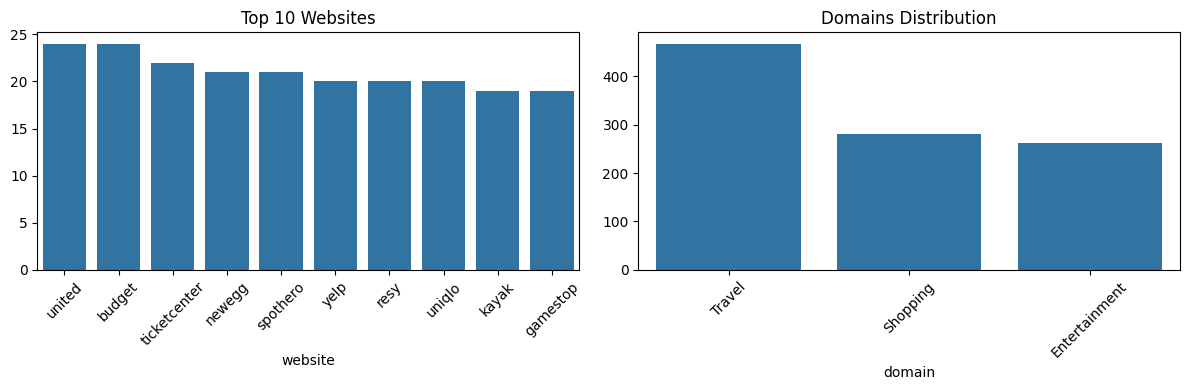

In [ ]:
# @title Top 10 websites and domains
top_websites = main_df['website'].value_counts().head(10)

# Count top domains
top_domains = main_df['domain'].value_counts().head(10)

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

# Plot top websites
sns.barplot(x=top_websites.index, y=top_websites.values, ax=axes[0])
axes[0].set_title('Top 10 Websites')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot top domains
sns.barplot(x=top_domains.index, y=top_domains.values, ax=axes[1])
axes[1].set_title('Domains Distribution')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


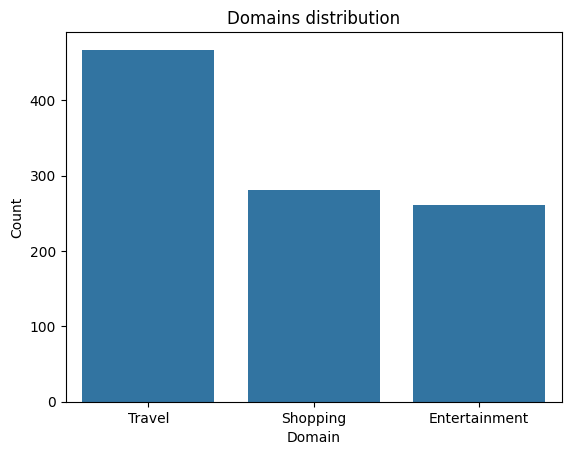

In [ ]:
# Count top domains
top_domains = main_df['domain'].value_counts()

sns.barplot(x=top_domains.index, y=top_domains.values)
plt.title('Domains distribution')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.show()

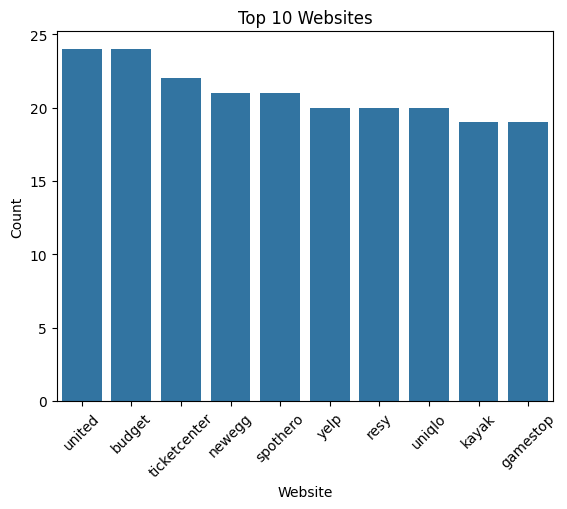

In [ ]:
top_websites = main_df['website'].value_counts().head(10)

sns.barplot(x=top_websites.index, y=top_websites.values)
# Set tcks rotation to 45 degrees
plt.xticks(rotation=45)
plt.title('Top 10 Websites')
plt.xlabel('Website')
plt.ylabel('Count')
plt.show()

In [ ]:
# Print the standard deviation for the websites and the domains
print("Standard Deviation for Websites:", top_websites.std())
print("Standard Deviation for Domains:", top_domains.std())

Standard Deviation for Websites: 1.8257418583505538
Standard Deviation for Domains: 113.60164318060427


### Tasks Analysis

Question: <b><font color="red">What are the most common types of tasks?</font></b>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


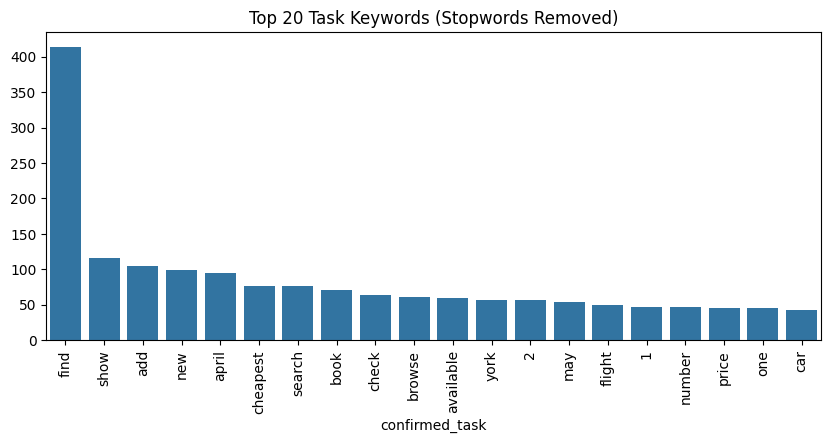

In [ ]:
#@title task analysis

import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopword list
stop_words = set(stopwords.words('english'))

# Analyze task descriptions, removing stopwords
task_keywords = main_df['confirmed_task'].str.lower().str.split().explode()
filtered_task_keywords = task_keywords[~task_keywords.isin(stop_words)]

# Count the top task keywords after removing stopwords
top_task_keywords = filtered_task_keywords.value_counts().head(20)

# Plot the results
plt.figure(figsize=(10, 4))
sns.barplot(x=top_task_keywords.index, y=top_task_keywords.values)
plt.title('Top 20 Task Keywords (Stopwords Removed)')
plt.xticks(rotation=90)
plt.show()


### Distribution of action sequence length


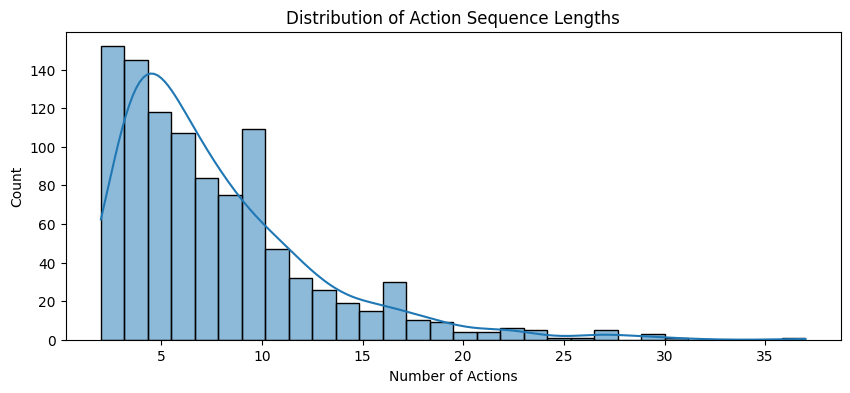

count    1009.000000
mean        7.705649
std         4.897924
min         2.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        37.000000
Name: action_sequence_length, dtype: float64


In [ ]:
#@title
#Calculate action sequence lengths
main_df['action_sequence_length'] = main_df['actions'].apply(len)

# Plot distribution
plt.figure(figsize=(10, 4))
sns.histplot(main_df['action_sequence_length'], kde=True)
plt.title('Distribution of Action Sequence Lengths')
plt.xlabel('Number of Actions')
plt.show()

# Summary statistics
print(main_df['action_sequence_length'].describe())

### Operations exploration

Question: <b><font color="red">Most common operation types</font></b>

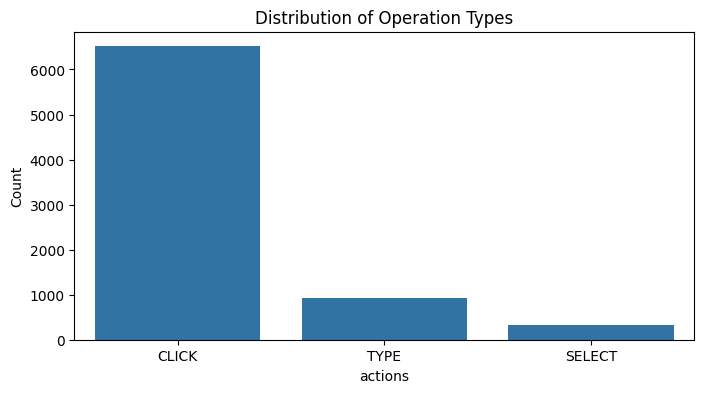

In [ ]:
#@title operations exploration
# Extract operation types
operation_types = main_df['actions'].apply(lambda x: [action['operation']['op'] for action in x]).explode()

# Count and visualize
op_counts = operation_types.value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=op_counts.index, y=op_counts.values)
plt.title('Distribution of Operation Types')
plt.ylabel('Count')
plt.show()

<b><font color="orange">**NOTE NOTE NOTE NOTE NOTE NOTE NOTE NOTE NOTE NOTE NOTE**</font></b>

Need a way to check on what the operation has been applied

### Number of actions and task complexity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


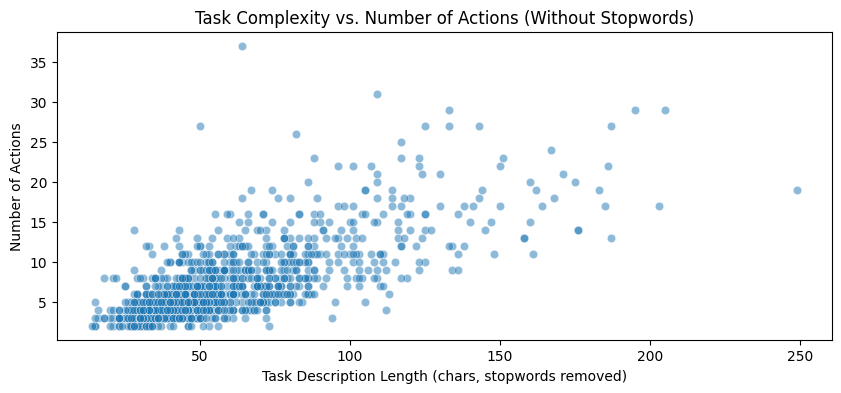

Correlation between task description length (without stopwords) and number of actions: 0.72


In [ ]:
#@title Correlation between task complexity and actions length
# NOTE: Removing the stopwords did not affect much the correlation value from 0.71 to 0.72
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define the stopword list
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a given text
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure the text is a string
        words = text.lower().split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)
    return text

# Remove stopwords from the task descriptions and calculate the description length
main_df['task_description_no_stopwords'] = main_df['confirmed_task'].apply(remove_stopwords)
main_df['task_description_length_no_stopwords'] = main_df['task_description_no_stopwords'].str.len()

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='task_description_length_no_stopwords', y='action_sequence_length', data=main_df, alpha=0.5)
plt.title('Task Complexity vs. Number of Actions (Without Stopwords)')
plt.xlabel('Task Description Length (chars, stopwords removed)')
plt.ylabel('Number of Actions')
plt.show()

# Calculate correlation
correlation = main_df['task_description_length_no_stopwords'].corr(main_df['action_sequence_length'])
print(f"Correlation between task description length (without stopwords) and number of actions: {correlation:.2f}")


### Positive and Ngative candidates analysis

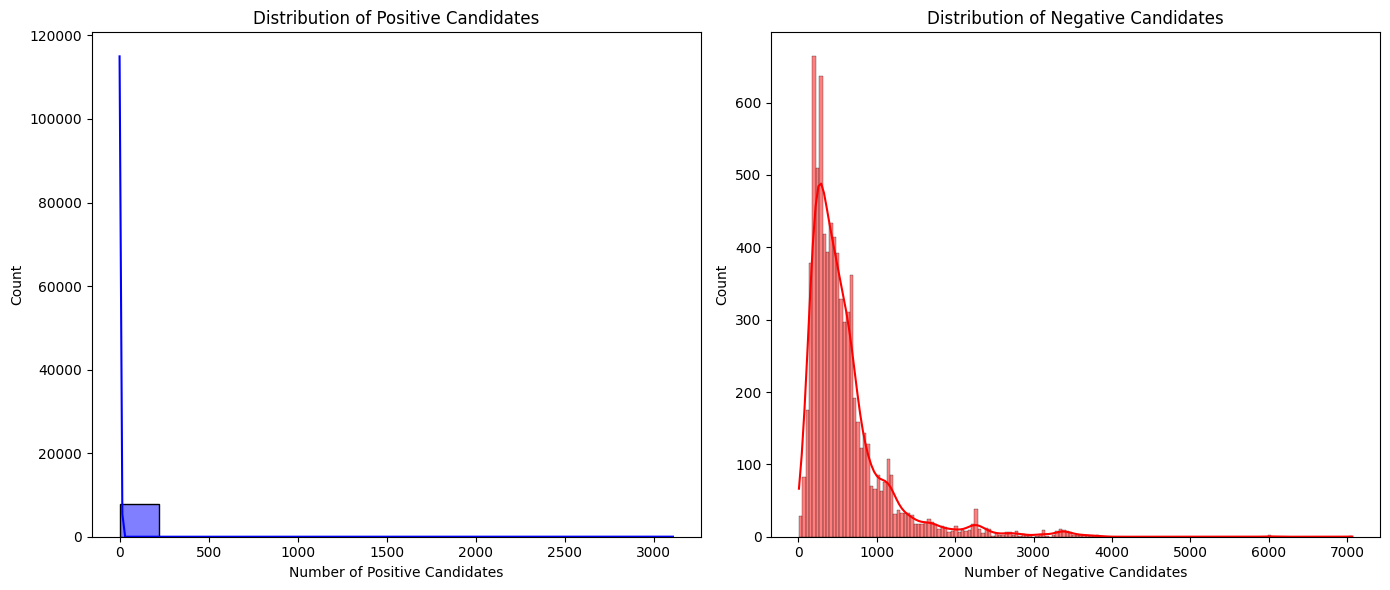

In [ ]:
#@title Positive and Negative candidates distribution
# Define the function to count positive and negative candidates
def count_candidates(action):
    return len(action['pos_candidates']), len(action['neg_candidates'])

# Apply the function to get counts of positive and negative candidates
main_df['pos_neg_counts'] = main_df['actions'].apply(lambda x: [count_candidates(action) for action in x])

# Extract positive and negative counts
pos_counts = [count[0] for counts in main_df['pos_neg_counts'] for count in counts]
neg_counts = [count[1] for counts in main_df['pos_neg_counts'] for count in counts]

# Create subplots for separate histograms
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Plot the distribution of positive candidates
sns.histplot(pos_counts, kde=True, color='blue', alpha=0.5, ax=axes[0])
axes[0].set_title('Distribution of Positive Candidates')
axes[0].set_xlabel('Number of Positive Candidates')

# Plot the distribution of negative candidates
sns.histplot(neg_counts, kde=True, color='red', alpha=0.5, ax=axes[1])
axes[1].set_title('Distribution of Negative Candidates')
axes[1].set_xlabel('Number of Negative Candidates')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Positive Candidates analysis

Question: <b><font color="red">Can there be more than one positive candidate per action?</font></b>

In [ ]:
#@title Positive candidates distribution
pos_candidates_counts = actions_df['num_pos_candidates'].value_counts().sort_index()

result_df = pd.DataFrame([pos_candidates_counts.index, pos_candidates_counts.values],
                         index = ['Number of Positive Candidates', 'Counts'])

# Create the DataFrame with the correct structure
result_df = pd.DataFrame({
    'Number of Positive Candidates': pos_candidates_counts.index,
    'Counts': pos_candidates_counts.values
})

# Calculate the total counts
total_counts = result_df['Counts'].sum()

# Calculate the percentage for each row
result_df['Percentage'] = ((result_df['Counts'] / total_counts) * 100).round(2)

# Display the updated DataFrame
print(result_df)

#TODO: Store results_df in drive so we only have to load it and visualize it

    Number of Positive Candidates  Counts  Percentage
0                               0     413        5.31
1                               1    7147       91.92
2                               2     143        1.84
3                               3      44        0.57
4                               4       6        0.08
5                               5       5        0.06
6                               6       4        0.05
7                               7       1        0.01
8                               8       2        0.03
9                               9       1        0.01
10                             12       1        0.01
11                             14       1        0.01
12                             16       1        0.01
13                             18       1        0.01
14                             57       1        0.01
15                             96       1        0.01
16                            131       1        0.01
17                          

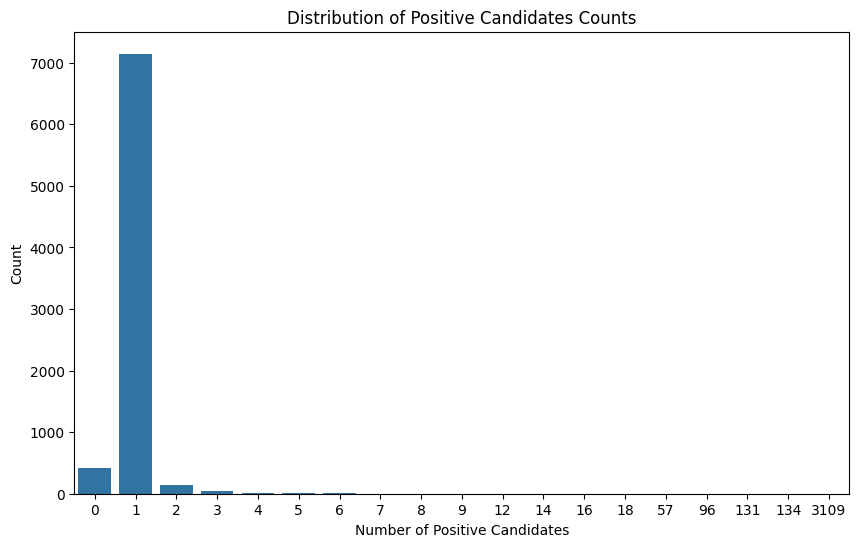

In [ ]:
# @title
# Plot the distribution of positive candidates counts
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_candidates_counts.index, y=pos_candidates_counts.values)
plt.xlabel('Number of Positive Candidates')
plt.ylabel('Count')
plt.title('Distribution of Positive Candidates Counts')
plt.show()

___
**Results**:

- 7147, which is the **91,92%** of the actions have only one possible *positive candidate*
- There are 413 actions with no *positive candidate*
- There is a small percentage with higher than 2 *positive candidates* but have a very high number of them.
___

**New Questions**
1. Investigate the actions with unusually high numbers of positive candidates (e.g., 3,109, 134, 131).
2. Look into the actions with zero positive candidates to understand why they occur.
3. Examine if there's any pattern in the actions that have multiple positive candidates (2 or more) - are they associated with specific websites or types of actions?
___

### Positive Candidates in HTML

In [ ]:
# Check how many of the candidates in the HTML have no text

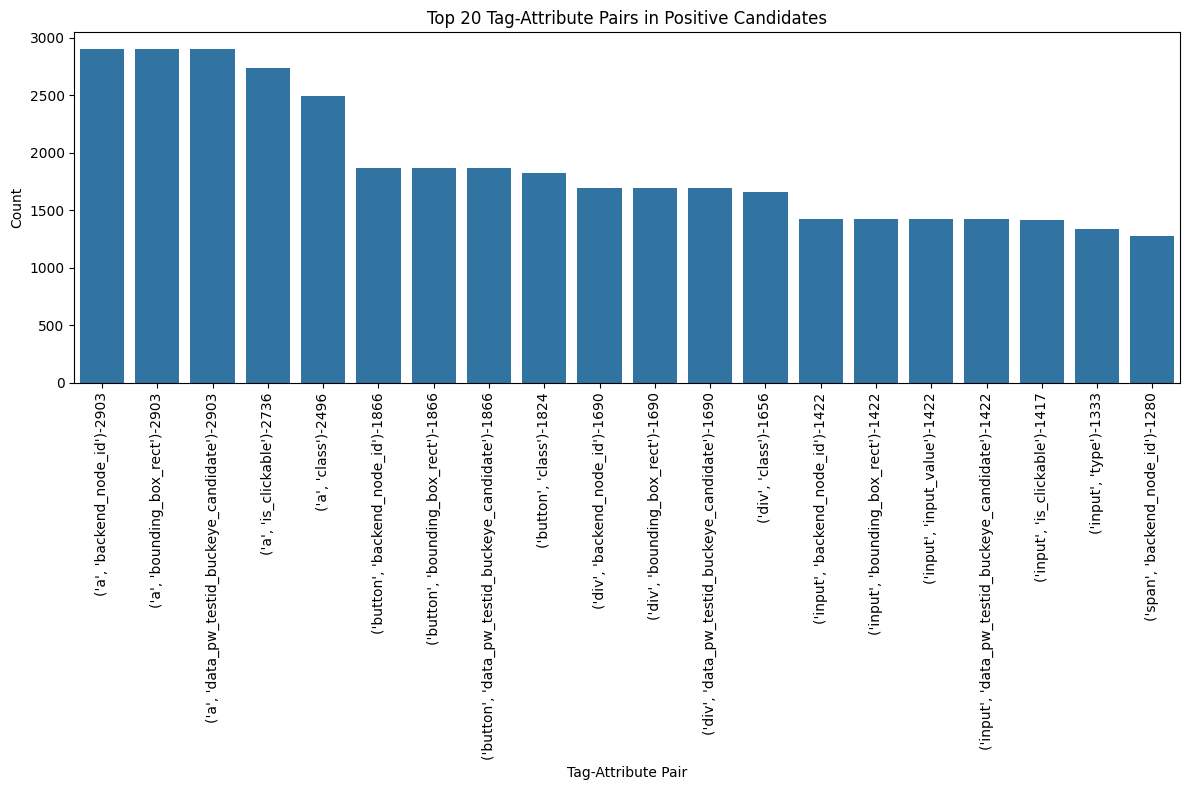

Total number of positive candidates: 11257
Number of unique tags: 52
Number of unique attributes: 19

Top 5 tags:
[('a', 2903), ('button', 1866), ('div', 1690), ('input', 1422), ('span', 1280)]

Top 5 attributes:
[('backend_node_id', 11257), ('bounding_box_rect', 11257), ('data_pw_testid_buckeye_candidate', 11257), ('class', 10055), ('is_clickable', 4814)]


In [ ]:
#@title Top 20 Tag-Attribute Pairs in Positive Candidates
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import json
from collections import Counter

# Assuming df is our DataFrame with the dataset

def extract_positive_candidates(df):
    all_pos_candidates = []
    for _, row in df.iterrows():
        for action in row['actions']:
            all_pos_candidates.extend(action['pos_candidates'])
    return all_pos_candidates

def analyze_positive_candidates(df):
    # Extract all positive candidates
    all_pos_candidates = extract_positive_candidates(df)

    # Helper function to extract attributes from a candidate
    def extract_attributes(candidate):
        return json.loads(candidate['attributes'])

    # Extract tag distribution
    tag_counter = Counter(candidate['tag'] for candidate in all_pos_candidates)

    # Extract attribute distribution
    attr_counter = Counter()
    for candidate in all_pos_candidates:
        attrs = extract_attributes(candidate)
        attr_counter.update(attrs.keys())

    # Analyze content and structure
    def analyze_element(candidate):
        attrs = extract_attributes(candidate)
        return {
            'has_id': 'id' in attrs,
            'has_class': 'class' in attrs,
            'has_name': 'name' in attrs,
            'has_href': 'href' in attrs,
            'has_value': 'value' in attrs,
            'has_type': 'type' in attrs,
            'is_original_target': candidate['is_original_target'],
            'is_top_level_target': candidate['is_top_level_target']
        }

    element_analysis = [analyze_element(candidate) for candidate in all_pos_candidates]
    element_df = pd.DataFrame(element_analysis)

    return tag_counter, attr_counter, element_df, all_pos_candidates

# Run the analysis
tag_counter, attr_counter, element_df, all_pos_candidates = analyze_positive_candidates(main_df)

# Visualizations and further analysis remain the same as in the previous code...

# Additional analysis: Investigate the relationship between tags and attributes
def tag_attribute_relationship(all_pos_candidates):
    tag_attr_pairs = []
    for candidate in all_pos_candidates:
        tag = candidate['tag']
        attrs = json.loads(candidate['attributes'])
        for attr in attrs.keys():
            tag_attr_pairs.append((tag, attr))

    return Counter(tag_attr_pairs)

tag_attr_counter = tag_attribute_relationship(all_pos_candidates)

# Visualize top tag-attribute pairs
top_pairs = tag_attr_counter.most_common(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=[f"{tag}-{attr}" for tag, attr in top_pairs], y=[count for _, count in top_pairs])
plt.title('Top 20 Tag-Attribute Pairs in Positive Candidates')
plt.xlabel('Tag-Attribute Pair')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Total number of positive candidates: {len(all_pos_candidates)}")
print(f"Number of unique tags: {len(tag_counter)}")
print(f"Number of unique attributes: {len(attr_counter)}")
print("\nTop 5 tags:")
print(tag_counter.most_common(5))
print("\nTop 5 attributes:")
print(attr_counter.most_common(5))

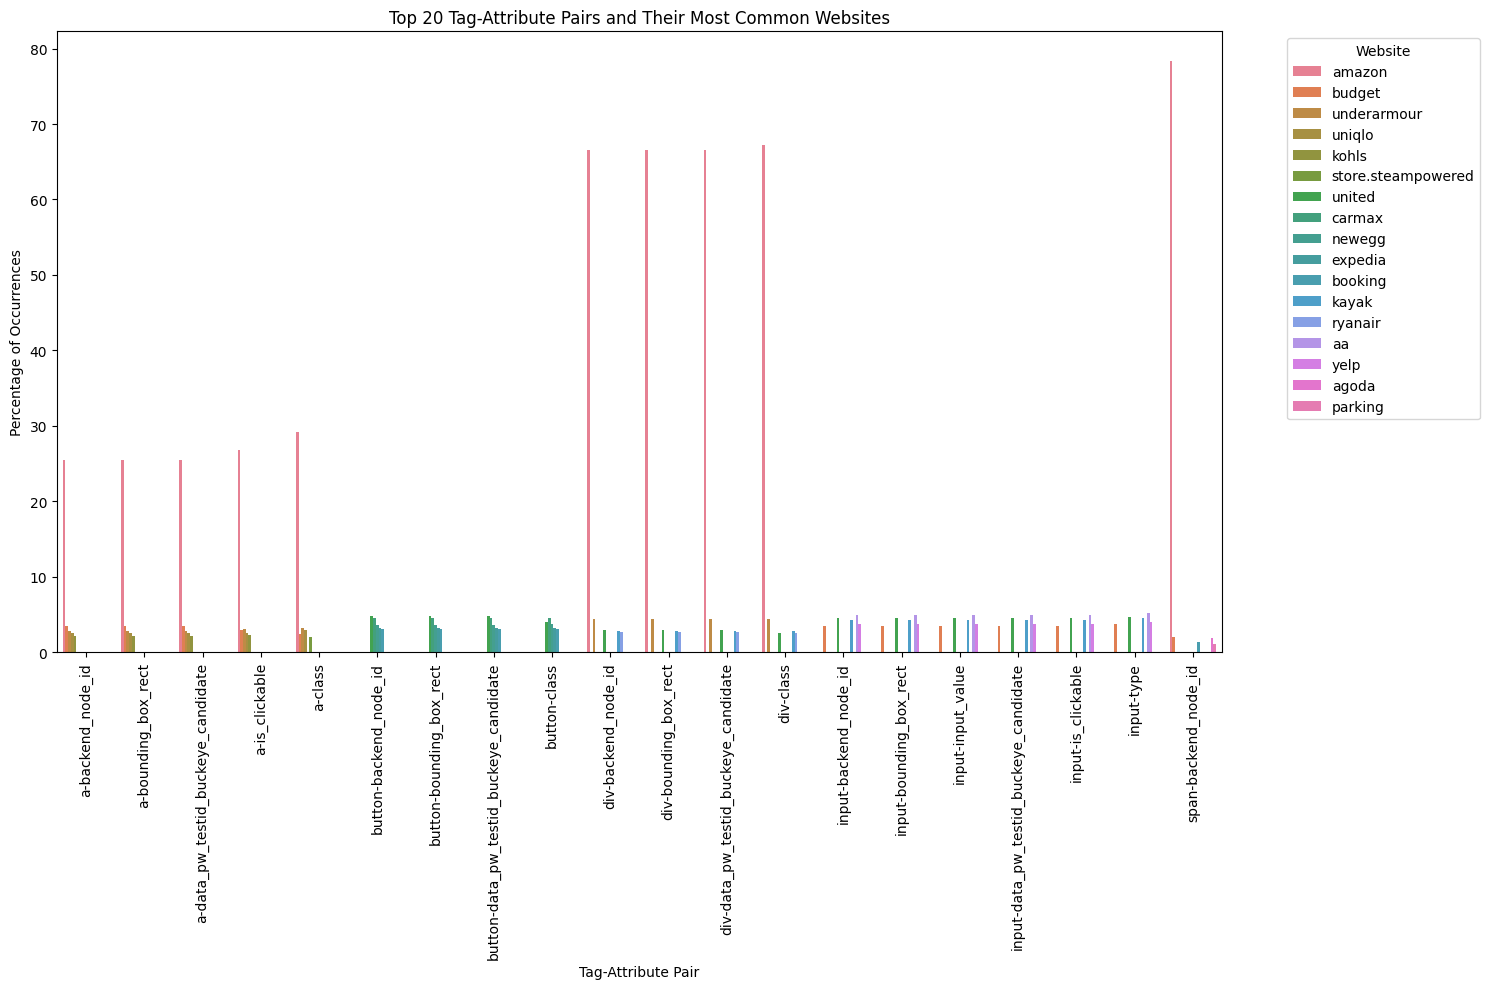


Top 20 Tag-Attribute Pairs and their top 5 websites:

a-backend_node_id:
  amazon: 739 (25.46%)
  budget: 100 (3.44%)
  underarmour: 84 (2.89%)
  uniqlo: 73 (2.51%)
  kohls: 63 (2.17%)

a-bounding_box_rect:
  amazon: 739 (25.46%)
  budget: 100 (3.44%)
  underarmour: 84 (2.89%)
  uniqlo: 73 (2.51%)
  kohls: 63 (2.17%)

a-data_pw_testid_buckeye_candidate:
  amazon: 739 (25.46%)
  budget: 100 (3.44%)
  underarmour: 84 (2.89%)
  uniqlo: 73 (2.51%)
  kohls: 63 (2.17%)

a-is_clickable:
  amazon: 734 (26.83%)
  underarmour: 84 (3.07%)
  budget: 81 (2.96%)
  uniqlo: 71 (2.60%)
  kohls: 63 (2.30%)

a-class:
  amazon: 730 (29.25%)
  underarmour: 82 (3.29%)
  uniqlo: 73 (2.92%)
  budget: 61 (2.44%)
  store.steampowered: 51 (2.04%)

button-backend_node_id:
  united: 91 (4.88%)
  carmax: 84 (4.50%)
  newegg: 68 (3.64%)
  expedia: 60 (3.22%)
  booking: 57 (3.05%)

button-bounding_box_rect:
  united: 91 (4.88%)
  carmax: 84 (4.50%)
  newegg: 68 (3.64%)
  expedia: 60 (3.22%)
  booking: 57 (3.05%)

bu

In [ ]:
#@title Tags and attr per website
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter, defaultdict

def analyze_tag_attrs_and_websites(df):
    tag_attr_website_counter = defaultdict(Counter)

    for _, row in df.iterrows():
        website = row['website']
        for action in row['actions']:
            for candidate in action['pos_candidates']:
                tag = candidate['tag']
                attrs = json.loads(candidate['attributes'])
                for attr in attrs.keys():
                    tag_attr_pair = f"{tag}-{attr}"
                    tag_attr_website_counter[tag_attr_pair][website] += 1

    # Get top 20 tag-attribute pairs
    top_20_pairs = sorted(tag_attr_website_counter.items(), key=lambda x: sum(x[1].values()), reverse=True)[:20]
    return top_20_pairs

# Run the analysis
top_20_pairs = analyze_tag_attrs_and_websites(main_df)

# Visualize Top 20 Tag-Attribute Pairs and their Websites
plt.figure(figsize=(15, 10))
data = []
for pair, website_counter in top_20_pairs:
    total = sum(website_counter.values())
    for website, count in website_counter.most_common(5):  # Top 5 websites per pair
        data.append({
            'Tag-Attribute Pair': pair,
            'Website': website,
            'Percentage': (count / total) * 100
        })

df_pairs = pd.DataFrame(data)
sns.barplot(x='Tag-Attribute Pair', y='Percentage', hue='Website', data=df_pairs)
plt.title('Top 20 Tag-Attribute Pairs and Their Most Common Websites')
plt.xlabel('Tag-Attribute Pair')
plt.ylabel('Percentage of Occurrences')
plt.xticks(rotation=90)
plt.legend(title='Website', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print detailed breakdown
print("\nTop 20 Tag-Attribute Pairs and their top 5 websites:")
for pair, website_counter in top_20_pairs:
    print(f"\n{pair}:")
    total = sum(website_counter.values())
    for website, count in website_counter.most_common(5):
        percentage = (count / total) * 100
        print(f"  {website}: {count} ({percentage:.2f}%)")

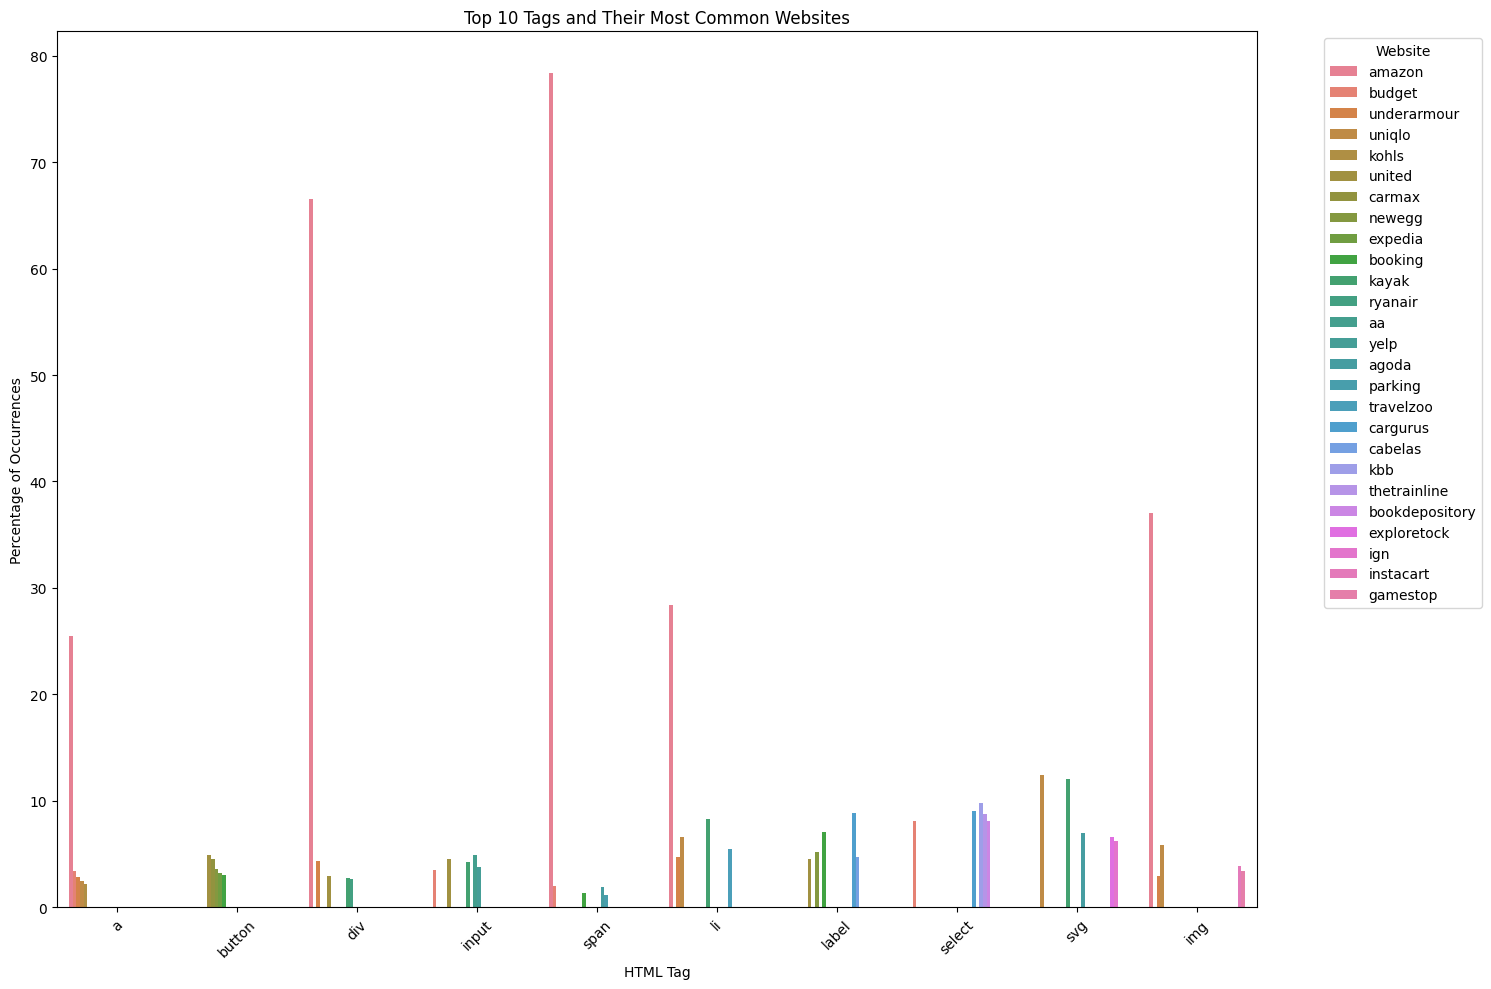

Top 10 Tags and their total occurrences:
a: 2903
button: 1866
div: 1690
input: 1422
span: 1280
li: 532
label: 440
select: 297
svg: 273
img: 205

Top 5 websites for each tag:

a:
  amazon: 739
  budget: 100
  underarmour: 84
  uniqlo: 73
  kohls: 63

button:
  united: 91
  carmax: 84
  newegg: 68
  expedia: 60
  booking: 57

div:
  amazon: 1125
  underarmour: 74
  united: 50
  kayak: 47
  ryanair: 45

input:
  aa: 70
  united: 64
  kayak: 61
  yelp: 54
  budget: 50

span:
  amazon: 1003
  budget: 26
  agoda: 25
  booking: 17
  parking: 15

li:
  amazon: 151
  kayak: 44
  uniqlo: 35
  travelzoo: 29
  underarmour: 25

label:
  cargurus: 39
  booking: 31
  newegg: 23
  cabelas: 21
  united: 20

select:
  kbb: 29
  cargurus: 27
  thetrainline: 26
  budget: 24
  bookdepository: 24

svg:
  uniqlo: 34
  kayak: 33
  agoda: 19
  exploretock: 18
  ign: 17

img:
  amazon: 76
  uniqlo: 12
  instacart: 8
  gamestop: 7
  underarmour: 6


In [ ]:
#@title top 10 tags and websites
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

def extract_positive_candidates_with_website(df):
    all_pos_candidates = []
    for _, row in df.iterrows():
        website = row['website']
        for action in row['actions']:
            for candidate in action['pos_candidates']:
                all_pos_candidates.append((candidate['tag'], website))
    return all_pos_candidates

def analyze_top_tags_and_websites(df):
    pos_candidates = extract_positive_candidates_with_website(df)

    # Count tags
    tag_counter = Counter(tag for tag, _ in pos_candidates)
    top_10_tags = dict(tag_counter.most_common(10))

    # Analyze websites for top 10 tags
    tag_website_counter = defaultdict(Counter)
    for tag, website in pos_candidates:
        if tag in top_10_tags:
            tag_website_counter[tag][website] += 1

    # Prepare data for visualization
    data = []
    for tag in top_10_tags:
        total = sum(tag_website_counter[tag].values())
        for website, count in tag_website_counter[tag].most_common(5):  # Top 5 websites per tag
            data.append({
                'Tag': tag,
                'Website': website,
                'Percentage': (count / total) * 100
            })

    return pd.DataFrame(data), top_10_tags, tag_website_counter

# Run the analysis
df_analysis, top_10_tags, tag_website_counter = analyze_top_tags_and_websites(main_df)

# Visualization
plt.figure(figsize=(15, 10))
sns.barplot(x='Tag', y='Percentage', hue='Website', data=df_analysis)
plt.title('Top 10 Tags and Their Most Common Websites')
plt.xlabel('HTML Tag')
plt.ylabel('Percentage of Occurrences')
plt.xticks(rotation=45)
plt.legend(title='Website', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print summary
print("Top 10 Tags and their total occurrences:")
for tag, count in top_10_tags.items():
    print(f"{tag}: {count}")

print("\nTop 5 websites for each tag:")
for tag in top_10_tags:
    print(f"\n{tag}:")
    for website, count in tag_website_counter[tag].most_common(5):
        print(f"  {website}: {count}")

### HTML Length distribution analysis

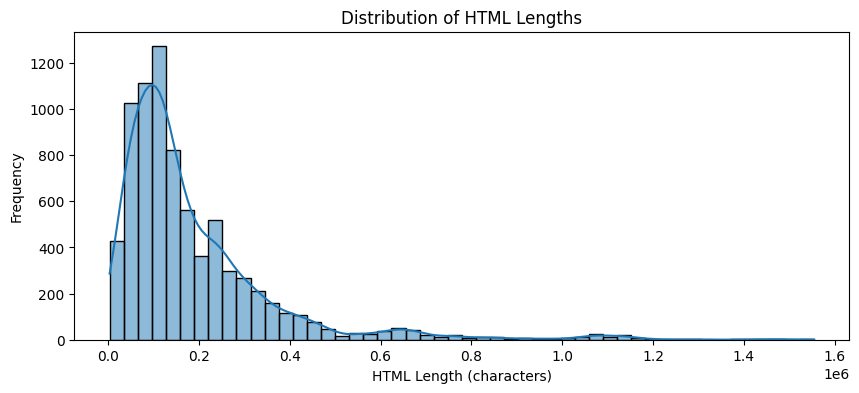

HTML Length Statistics:
Mean: 186373.62
Median: 128818.00
Min: 3307
Max: 1554932
Standard Deviation: 179585.90
25th percentile: 79059.50
50th percentile: 128818.00
75th percentile: 235996.50
90th percentile: 368360.80
95th percentile: 507153.10
99th percentile: 1061125.74


In [ ]:
#@title length distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def analyze_html_length(df):
    html_lengths = []
    for _, row in df.iterrows():
        for action in row['actions']:
            html_length = len(action['cleaned_html'])
            html_lengths.append(html_length)
    return html_lengths

# Run the analysis
html_lengths = analyze_html_length(main_df)

# Visualize HTML Length Distribution
plt.figure(figsize=(10, 4))
sns.histplot(html_lengths, kde=True, bins=50)
plt.title('Distribution of HTML Lengths')
plt.xlabel('HTML Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics
print("HTML Length Statistics:")
print(f"Mean: {np.mean(html_lengths):.2f}")
print(f"Median: {np.median(html_lengths):.2f}")
print(f"Min: {np.min(html_lengths)}")
print(f"Max: {np.max(html_lengths)}")
print(f"Standard Deviation: {np.std(html_lengths):.2f}")

# Calculate and print percentiles
percentiles = [25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(html_lengths, p)
    print(f"{p}th percentile: {value:.2f}")

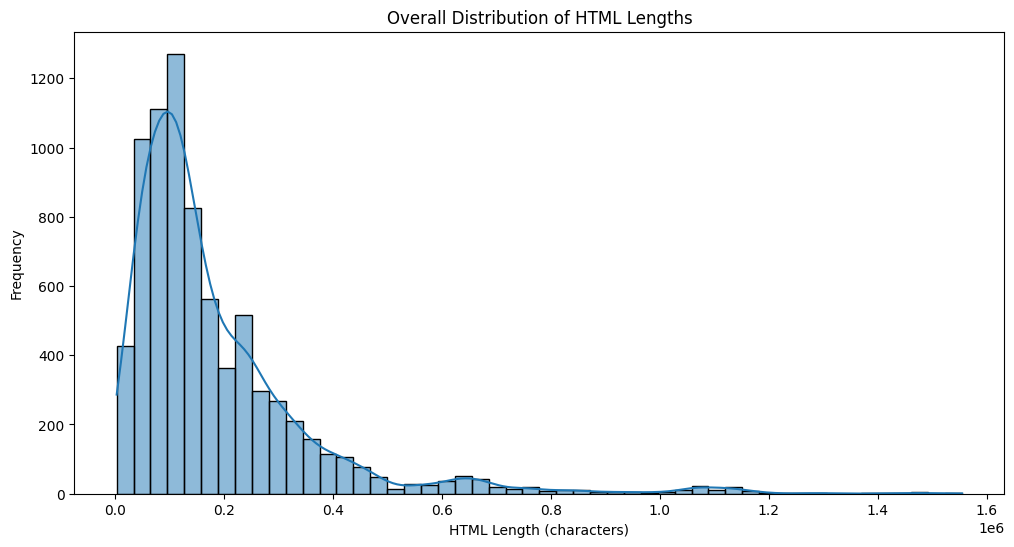

Overall HTML Length Statistics:
Mean: 186373.62
Median: 128818.00
Min: 3307
Max: 1554932
Standard Deviation: 179585.90
25th percentile: 79059.50
50th percentile: 128818.00
75th percentile: 235996.50
90th percentile: 368360.80
95th percentile: 507153.10
99th percentile: 1061125.74


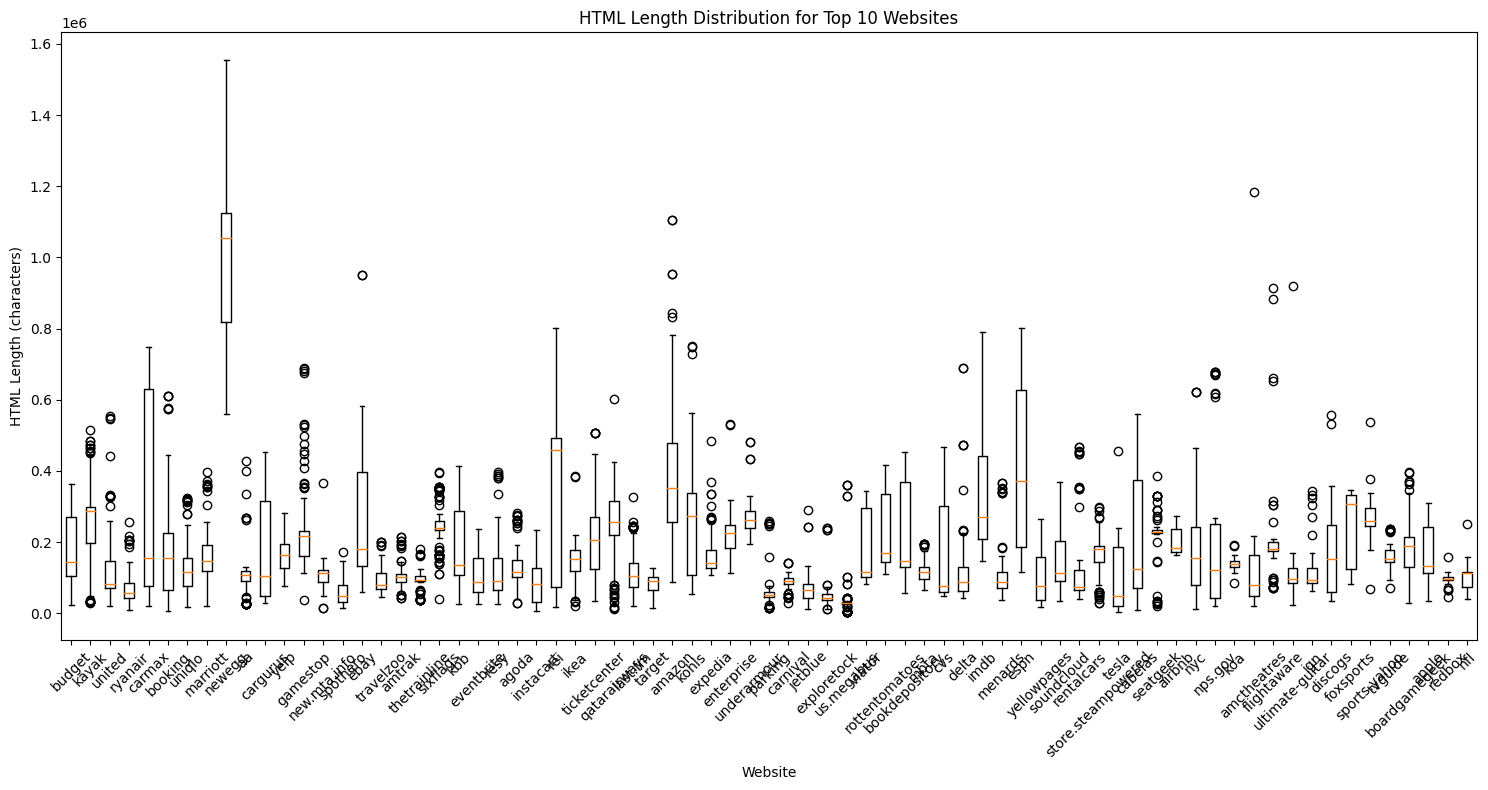


HTML Length Statistics for Top 10 Websites:

budget:
  Number of pages: 249
  Mean: 182830.51
  Median: 145250.00
  Min: 22924
  Max: 362275
  Standard Deviation: 88462.13

kayak:
  Number of pages: 230
  Mean: 263658.39
  Median: 287977.50
  Min: 28859
  Max: 515664
  Standard Deviation: 92310.54

united:
  Number of pages: 217
  Mean: 114782.88
  Median: 81255.00
  Min: 20351
  Max: 555026
  Standard Deviation: 83657.07

ryanair:
  Number of pages: 199
  Mean: 70664.87
  Median: 58239.00
  Min: 9196
  Max: 255597
  Standard Deviation: 45501.85

carmax:
  Number of pages: 190
  Mean: 309719.55
  Median: 154604.00
  Min: 20497
  Max: 748756
  Standard Deviation: 270782.74

booking:
  Number of pages: 173
  Mean: 185374.69
  Median: 154846.00
  Min: 6839
  Max: 611909
  Standard Deviation: 144328.65

uniqlo:
  Number of pages: 169
  Mean: 127214.75
  Median: 117453.00
  Min: 16598
  Max: 323814
  Standard Deviation: 70191.45

marriott:
  Number of pages: 166
  Mean: 155948.09
  Median:

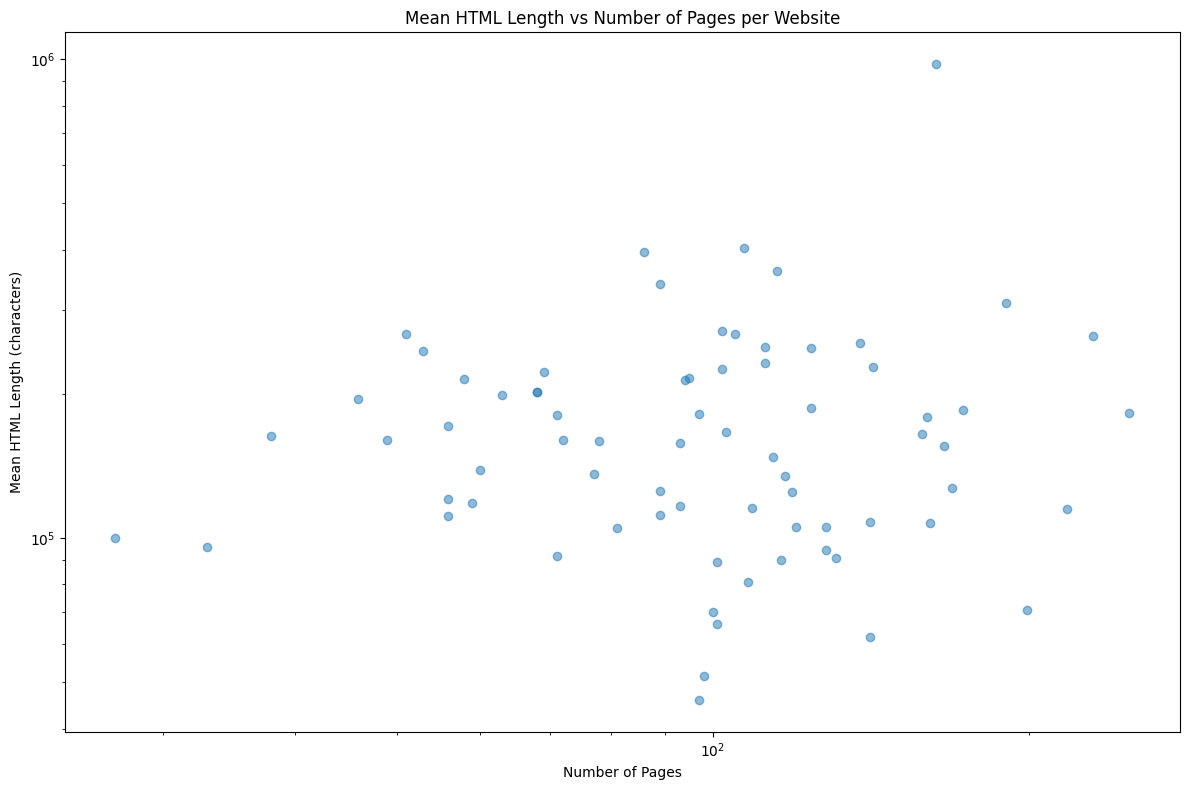


Websites with Extreme HTML Lengths:
Longest average HTML: newegg (Mean: 976619.84, Pages: 163)
Shortest average HTML: us.megabus (Mean: 45836.67, Pages: 97)
Most pages: budget (Pages: 249, Mean HTML length: 182830.51)
Least pages: nfl (Pages: 27, Mean HTML length: 99854.04)


In [ ]:
#@title html length in depth analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

def analyze_html_length_with_websites(df):
    website_html_lengths = defaultdict(list)
    for _, row in df.iterrows():
        website = row['website']
        for action in row['actions']:
            html_length = len(action['cleaned_html'])
            website_html_lengths[website].append(html_length)
    return website_html_lengths

# Run the analysis
website_html_lengths = analyze_html_length_with_websites(main_df)

# Calculate overall statistics
all_lengths = [length for lengths in website_html_lengths.values() for length in lengths]

# Overall distribution
plt.figure(figsize=(12, 6))
sns.histplot(all_lengths, kde=True, bins=50)
plt.title('Overall Distribution of HTML Lengths')
plt.xlabel('HTML Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Print overall summary statistics
print("Overall HTML Length Statistics:")
print(f"Mean: {np.mean(all_lengths):.2f}")
print(f"Median: {np.median(all_lengths):.2f}")
print(f"Min: {np.min(all_lengths)}")
print(f"Max: {np.max(all_lengths)}")
print(f"Standard Deviation: {np.std(all_lengths):.2f}")

# Calculate and print overall percentiles
percentiles = [25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = np.percentile(all_lengths, p)
    print(f"{p}th percentile: {value:.2f}")

# Analyze top 10 websites by number of pages
top_websites = sorted(website_html_lengths.items(), key=lambda x: len(x[1]), reverse=True)
# Box plot for top 10 websites
plt.figure(figsize=(15, 8))
box_data = [lengths for _, lengths in top_websites]
plt.boxplot(box_data, labels=[website for website, _ in top_websites])
plt.title('HTML Length Distribution for Top 10 Websites')
plt.xlabel('Website')
plt.ylabel('HTML Length (characters)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print statistics for top 10 websites
print("\nHTML Length Statistics for Top 10 Websites:")
for website, lengths in top_websites:
    print(f"\n{website}:")
    print(f"  Number of pages: {len(lengths)}")
    print(f"  Mean: {np.mean(lengths):.2f}")
    print(f"  Median: {np.median(lengths):.2f}")
    print(f"  Min: {np.min(lengths)}")
    print(f"  Max: {np.max(lengths)}")
    print(f"  Standard Deviation: {np.std(lengths):.2f}")

# Scatter plot of mean HTML length vs number of pages for all websites
website_stats = [(website, np.mean(lengths), len(lengths)) for website, lengths in website_html_lengths.items()]
mean_lengths, page_counts = zip(*[(mean, count) for _, mean, count in website_stats])

plt.figure(figsize=(12, 8))
plt.scatter(page_counts, mean_lengths, alpha=0.5)
plt.title('Mean HTML Length vs Number of Pages per Website')
plt.xlabel('Number of Pages')
plt.ylabel('Mean HTML Length (characters)')
plt.xscale('log')  # Use log scale for better visualization if there's high variance in page counts
plt.yscale('log')  # Use log scale for better visualization if there's high variance in mean lengths
plt.tight_layout()
plt.show()

# Identify and print websites with extreme HTML lengths
print("\nWebsites with Extreme HTML Lengths:")
longest_html = max(website_stats, key=lambda x: x[1])
shortest_html = min(website_stats, key=lambda x: x[1])
most_pages = max(website_stats, key=lambda x: x[2])
least_pages = min(website_stats, key=lambda x: x[2])

print(f"Longest average HTML: {longest_html[0]} (Mean: {longest_html[1]:.2f}, Pages: {longest_html[2]})")
print(f"Shortest average HTML: {shortest_html[0]} (Mean: {shortest_html[1]:.2f}, Pages: {shortest_html[2]})")
print(f"Most pages: {most_pages[0]} (Pages: {most_pages[2]}, Mean HTML length: {most_pages[1]:.2f})")
print(f"Least pages: {least_pages[0]} (Pages: {least_pages[2]}, Mean HTML length: {least_pages[1]:.2f})")

In [ ]:
#@title Clean HTML Token lenghts analysis
# Import necessary libraries
import pandas as pd
from transformers import GPT2Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Make a copy to avoid modifying the original DataFrame
df = main_df.copy()

# Explode the 'actions' column so each action is a separate row
df = df.explode('actions').reset_index(drop=True)

# Extract 'cleaned_html' from the 'actions' dictionaries
df['cleaned_html'] = df['actions'].apply(lambda x: x.get('cleaned_html') if isinstance(x, dict) else None)

# Remove rows with missing or empty 'cleaned_html'
df = df[df['cleaned_html'].notnull() & df['cleaned_html'].str.strip().ne('')]

# Tokenize 'cleaned_html' and compute token lengths
df['token_length'] = df['cleaned_html'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))

# Compute overall statistics
mean_length = df['token_length'].mean()
median_length = df['token_length'].median()
std_length = df['token_length'].std()
percentiles = df['token_length'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

print("Overall Token Length Statistics:")
print(f"Mean: {mean_length}")
print(f"Median: {median_length}")
print(f"Standard Deviation: {std_length}")
print("Percentiles:")
print(percentiles)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (25706 > 1024). Running this sequence through the model will result in indexing errors


Overall Token Length Statistics:
Mean: 128827.44810289389
Median: 86450.0
Standard Deviation: 129532.80201829945
Percentiles:
0.25     53095.50
0.50     86450.00
0.75    163062.00
0.90    253276.20
0.95    354587.20
0.99    781325.76
Name: token_length, dtype: float64


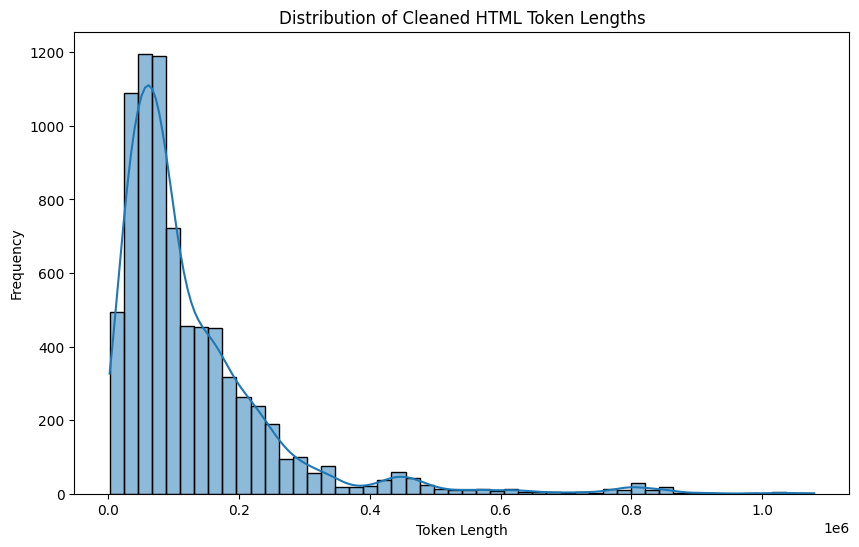

In [ ]:
#@title Plot token length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['token_length'], bins=50, kde=True)
plt.title('Distribution of Cleaned HTML Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()



Token Length Statistics per Website:
                      mean    median            std  count
website                                                   
aa            65309.204969   64688.0   36888.710075    161
agoda         91911.418803   77976.0   37343.007534    117
airbnb       156864.367647  142616.0   28047.570303     68
amazon       278417.233645  251583.0  153221.232587    107
amctheatres   81327.627119   55712.0  108180.515793     59
...                    ...       ...            ...    ...
united        82751.516129   58991.0   63211.845406    217
us.megabus    29793.721649   19945.0   46054.519600     97
viator       122477.845361   81025.0   63680.985530     97
yellowpages   67519.753086   44806.0   53238.145070     81
yelp         117679.911392  117807.5   33324.567298    158

[73 rows x 4 columns]


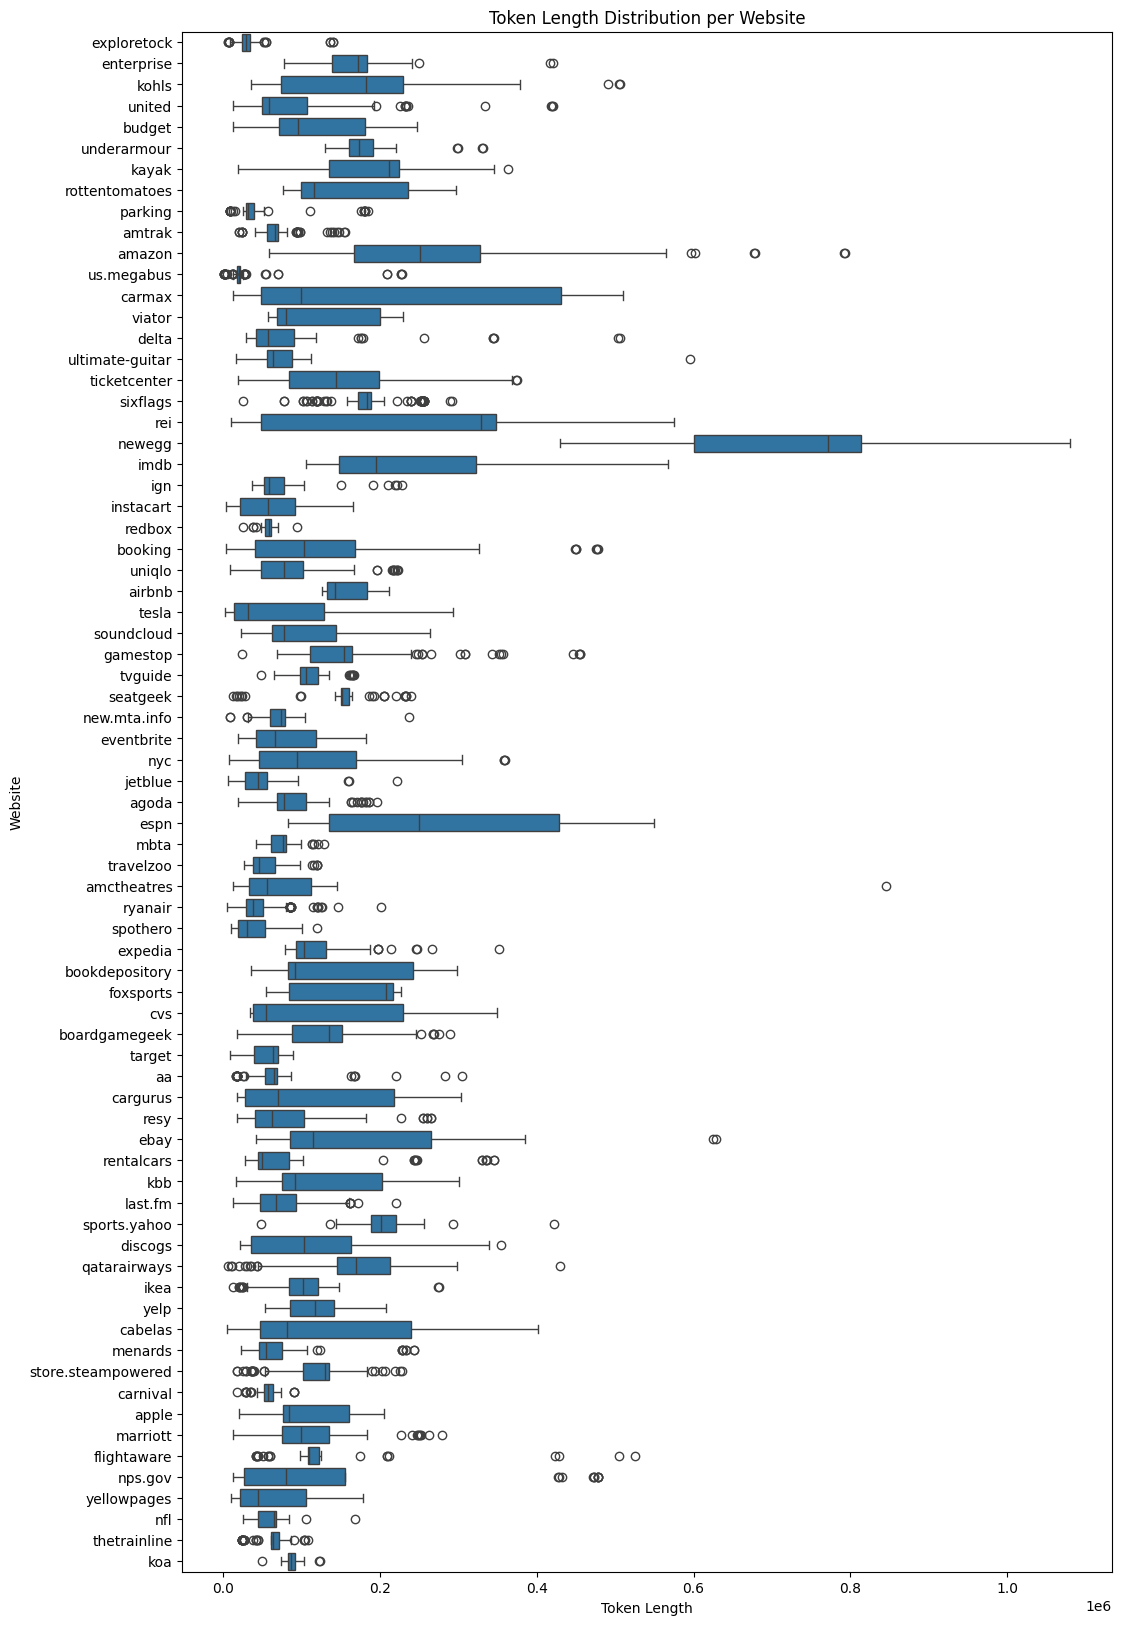

In [ ]:
#@title Per website token length analysis
# Compute statistics per website
website_stats = df.groupby('website')['token_length'].agg(['mean', 'median', 'std', 'count'])
print("\nToken Length Statistics per Website:")
print(website_stats)

# Visualize token length distribution per website
plt.figure(figsize=(12, 20))
sns.boxplot(x='token_length', y='website', data=df)
plt.title('Token Length Distribution per Website')
plt.xlabel('Token Length')
plt.ylabel('Website')
plt.show()


In [ ]:
#@title Per website token length LLM compatibility
# Define the LLM's maximum token limit
max_token_limit = 2048  # Adjust based on the specific LLM

# Identify entries exceeding the token limit
exceeding_limit = df[df['token_length'] > max_token_limit]
percentage_exceeding = (len(exceeding_limit) / len(df)) * 100

print(f"\n{percentage_exceeding:.2f}% of the 'cleaned_html' entries exceed the LLM's token limit of {max_token_limit} tokens.")

# Calculate the percentage exceeding the limit per website
website_exceeding = exceeding_limit.groupby('website').size()
website_total = df.groupby('website').size()
website_exceeding_percentage = (website_exceeding / website_total * 100).fillna(0)

print("\nPercentage of Entries Exceeding Token Limit per Website:")
print(website_exceeding_percentage)



99.94% of the 'cleaned_html' entries exceed the LLM's token limit of 2048 tokens.

Percentage of Entries Exceeding Token Limit per Website:
website
aa             100.000000
agoda          100.000000
airbnb         100.000000
amazon         100.000000
amctheatres    100.000000
                  ...    
united         100.000000
us.megabus      94.845361
viator         100.000000
yellowpages    100.000000
yelp           100.000000
Length: 73, dtype: float64


Token indices sequence length is longer than the specified maximum sequence length for this model (25706 > 1024). Running this sequence through the model will result in indexing errors



HTML Token Length Statistics:
Mean: 128827.44810289389
Median: 86450.0
Standard Deviation: 129532.80201829929
Percentiles:
0.25     53095.50
0.50     86450.00
0.75    163062.00
0.90    253276.20
0.95    354587.20
0.99    781325.76
Name: html_token_length, dtype: float64

JSON Token Length Statistics:
Mean: 65655.70855305466
Median: 41284.0
Standard Deviation: 80355.26178788443
Percentiles:
0.25     22917.00
0.50     41284.00
0.75     72190.00
0.90    143684.80
0.95    219705.40
0.99    434686.86
Name: json_token_length, dtype: float64

Token Length Difference (HTML - JSON) Statistics:
Mean difference: 63171.73954983923
Median difference: 39212.0
Standard Deviation of difference: 85729.28509054713


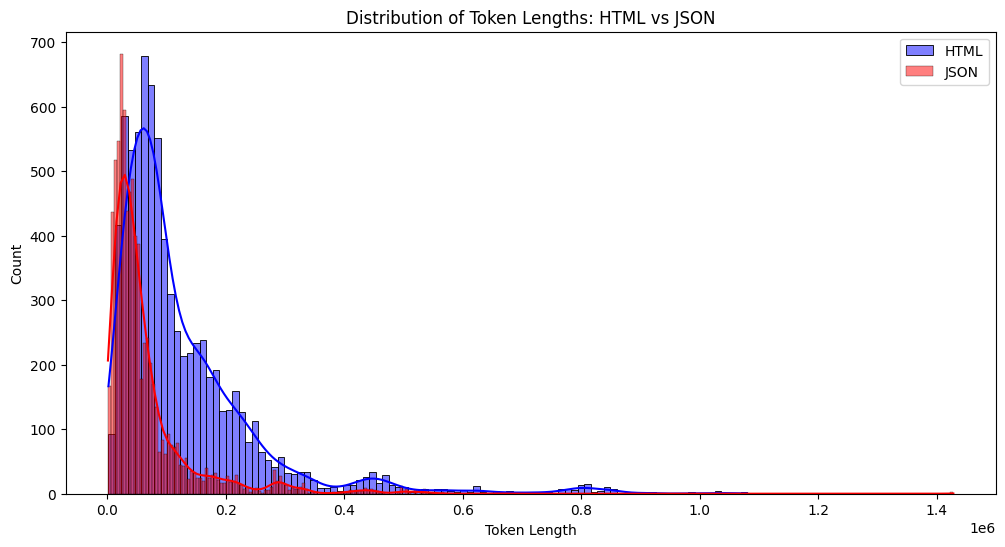

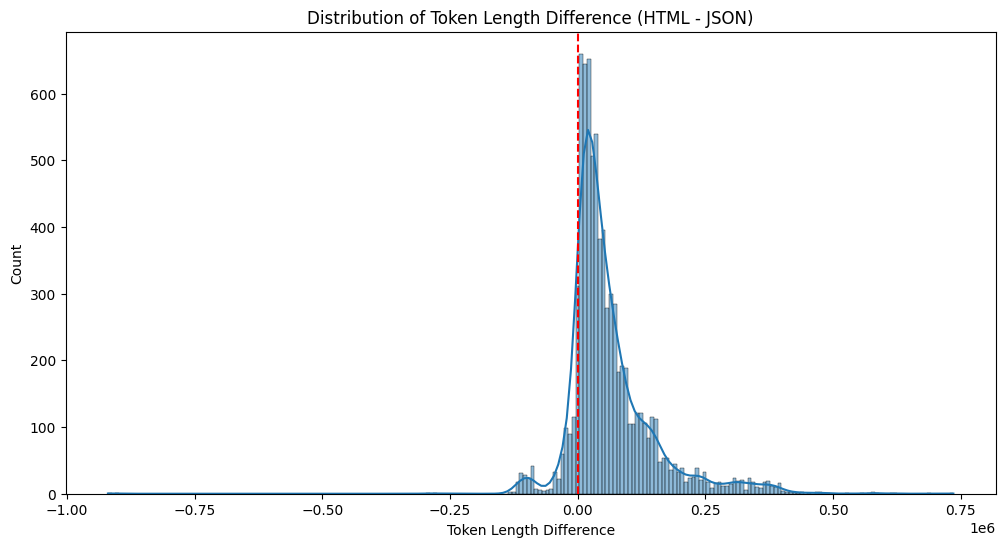

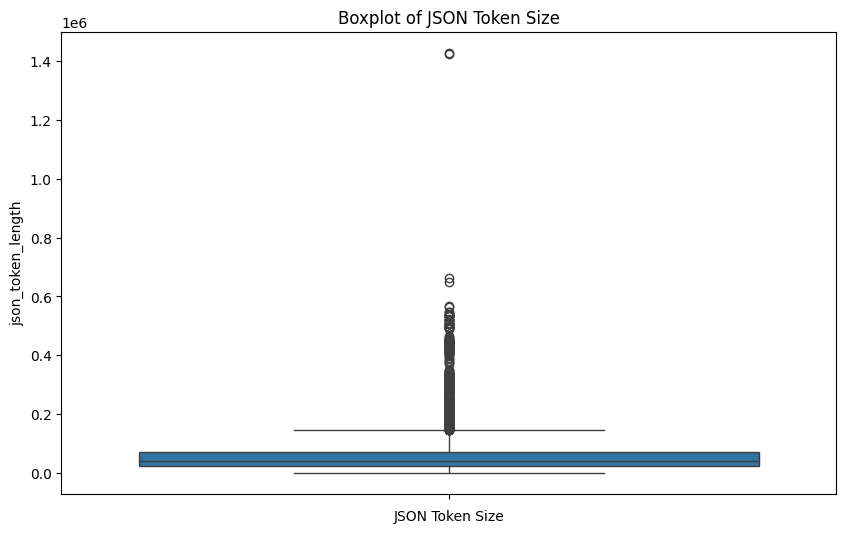

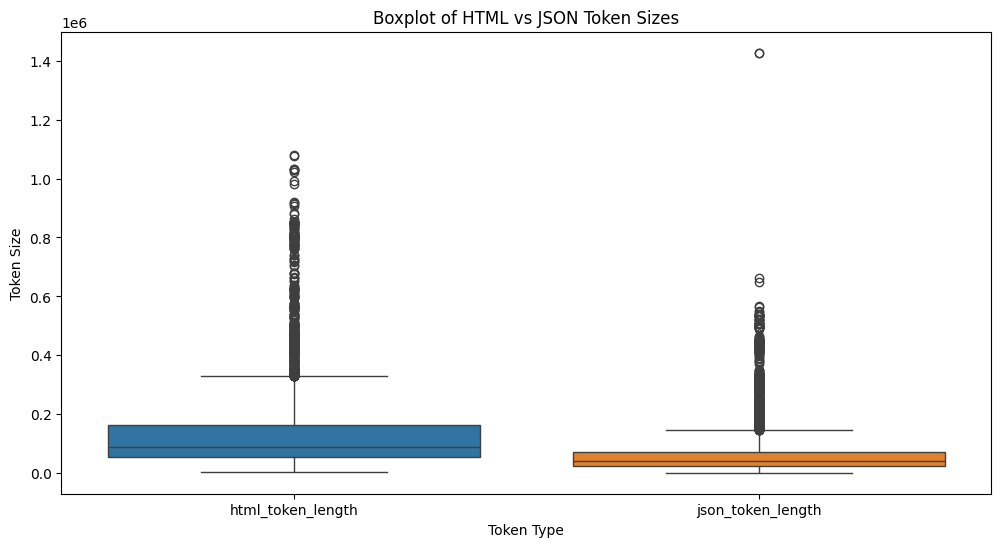

In [ ]:
#@title JSON VS HTML
import pandas as pd
from transformers import GPT2Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import json

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Make a copy to avoid modifying the original DataFrame
df = main_df.copy()

# Explode the 'actions' column so each action is a separate row
df = df.explode('actions').reset_index(drop=True)

# Extract 'cleaned_html' from the 'actions' dictionaries
df['cleaned_html'] = df['actions'].apply(lambda x: x.get('cleaned_html') if isinstance(x, dict) else None)

# Remove rows with missing or empty 'cleaned_html'
df = df[df['cleaned_html'].notnull() & df['cleaned_html'].str.strip().ne('')]


# Transform HTML to JSON and compute token lengths for both
df['json_data'] = df['cleaned_html'].apply(html_to_json)
df['html_token_length'] = df['cleaned_html'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
df['json_token_length'] = df['json_data'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))

# Compute statistics for both HTML and JSON
for format in ['html', 'json']:
    column = f'{format}_token_length'
    mean_length = df[column].mean()
    median_length = df[column].median()
    std_length = df[column].std()
    percentiles = df[column].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

    print(f"\n{format.upper()} Token Length Statistics:")
    print(f"Mean: {mean_length}")
    print(f"Median: {median_length}")
    print(f"Standard Deviation: {std_length}")
    print("Percentiles:")
    print(percentiles)

# Compute the difference in token length
df['token_length_difference'] = df['html_token_length'] - df['json_token_length']

# Print statistics on the difference
diff_mean = df['token_length_difference'].mean()
diff_median = df['token_length_difference'].median()
diff_std = df['token_length_difference'].std()

print("\nToken Length Difference (HTML - JSON) Statistics:")
print(f"Mean difference: {diff_mean}")
print(f"Median difference: {diff_median}")
print(f"Standard Deviation of difference: {diff_std}")

# Visualize the distribution of token lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='html_token_length', label='HTML', kde=True, color='blue', alpha=0.5)
sns.histplot(data=df, x='json_token_length', label='JSON', kde=True, color='red', alpha=0.5)
plt.title('Distribution of Token Lengths: HTML vs JSON')
plt.xlabel('Token Length')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualize the difference in token lengths
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='token_length_difference', kde=True)
plt.title('Distribution of Token Length Difference (HTML - JSON)')
plt.xlabel('Token Length Difference')
plt.ylabel('Count')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df['json_token_length'])

# Set the title and labels
plt.title('Boxplot of JSON Token Size')
plt.xlabel('JSON Token Size')

# Show the plot
plt.show()

# If you want to compare HTML and JSON token sizes side by side:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['html_token_length', 'json_token_length']])
plt.title('Boxplot of HTML vs JSON Token Sizes')
plt.xlabel('Token Type')
plt.ylabel('Token Size')
plt.show()

In [ ]:
df[['html_token_length','json_token_length','token_length_difference']]

html_token_length  json_token_length  token_length_difference
0               25706               6597                    19109
1               24378               6985                    17393
2               24926               7376                    17550
3               26577               7992                    18585
4               24506               7006                    17500
5              136884             131282                     5602
6               29593               6997                    22596
7               29720               6994                    22726
8               11617               5516                     6101
9               29407              10770                    18637
10              29398              10758                    18640

In [ ]:
#@title JSON VS HTML
task_index = 0 # @param {"type":"integer","placeholder":"0"}
action_index = 5 # @param {"type":"integer","placeholder":"0"}
import pandas as pd
from transformers import GPT2Tokenizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import json

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

action = main_df.iloc[task_index]['actions'][action_index]
html = action['cleaned_html']
json_data = html_to_json(html)

html_length = tokenizer.encode(html, add_special_tokens=False)
json_length = tokenizer.encode(json_data, add_special_tokens=False)

print(f"HTML Length: {len(html_length)}")
print(f"JSON Length: {len(json_length)}")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (136884 > 1024). Running this sequence through the model will result in indexing errors


HTML Length: 136884
JSON Length: 131282


#### HTML Exploration ROLES and TAGS Distributions

In [ ]:

#@title TAGS AND ROLES EXTRACTION
from bs4 import BeautifulSoup
from collections import Counter
import json

def analyze_html_role_distribution(html_content):
    # Parse the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')

    # Initialize counters
    role_counter = Counter()
    tag_counter = Counter()
    tag_role_counter = Counter()

    # Function to process each element
    def process_element(element):
        # Count tag
        tag_counter[element.name] += 1

        # Count role if present
        role = element.get('role')
        if role:
            role_counter[role] += 1
            tag_role_counter[(element.name, role)] += 1

        # Process children
        for child in element.children:
            if child.name:  # Check if it's a tag and not a string
                process_element(child)

    # Start processing from the root
    process_element(soup)

    # Prepare the results
    results = {
        "role_distribution": dict(role_counter),
        "tag_distribution": dict(tag_counter),
        "tag_role_distribution": {f"{tag}_{role}": count for (tag, role), count in tag_role_counter.items()},
        "total_elements": sum(tag_counter.values()),
        "total_elements_with_roles": sum(role_counter.values()),
        "unique_roles": len(role_counter),
        "unique_tags": len(tag_counter),
        "unique_tag_role_combinations": len(tag_role_counter)
    }

    return results

In [ ]:
#@title HTML ROLES PLOT
import matplotlib.pyplot as plt
import numpy as np

def plot_html_role_distribution(analysis_results):
    # Set up the plot style
    plt.style.use('ggplot')

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    fig.suptitle('HTML Role Distribution Analysis', fontsize=16)

    # 1. Role Distribution
    roles = list(analysis_results['role_distribution'].keys())
    role_counts = list(analysis_results['role_distribution'].values())
    axs[0, 0].bar(roles, role_counts)
    axs[0, 0].set_title('Role Distribution')
    axs[0, 0].set_xlabel('Roles')
    axs[0, 0].set_ylabel('Count')
    axs[0, 0].tick_params(axis='x', rotation=90)

    # 2. Tag Distribution
    tags = list(analysis_results['tag_distribution'].keys())
    tag_counts = list(analysis_results['tag_distribution'].values())
    axs[0, 1].bar(tags, tag_counts)
    axs[0, 1].set_title('Tag Distribution')
    axs[0, 1].set_xlabel('Tags')
    axs[0, 1].set_ylabel('Count')
    axs[0, 1].tick_params(axis='x', rotation=90)

# 3. Tag-Role Distribution
    tag_roles = list(analysis_results['tag_role_distribution'].keys())
    tag_role_counts = list(analysis_results['tag_role_distribution'].values())
    axs[1, 0].bar(tag_roles, tag_role_counts)
    axs[1, 0].set_title('Tag-Role Distribution')
    axs[1, 0].set_xlabel('Tag-Role Combinations')
    axs[1, 0].set_ylabel('Count')
    axs[1, 0].tick_params(axis='x', rotation=90)

    # 4. Summary Statistics
    summary_stats = [
        'total_elements', 'total_elements_with_roles',
        'unique_roles', 'unique_tags', 'unique_tag_role_combinations'
    ]
    summary_values = [analysis_results[stat] for stat in summary_stats]
    axs[1, 1].bar(summary_stats, summary_values)
    axs[1, 1].set_title('Summary Statistics')
    axs[1, 1].set_xlabel('Metric')
    axs[1, 1].set_ylabel('Count')
    #axs[1, 1].tick_params(axis='x', rotation=45, ha='right') # The x-axis tick_params does not have the ha parameter.
    axs[1, 1].tick_params(axis='x', rotation=45) # Remove the ha parameter.

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

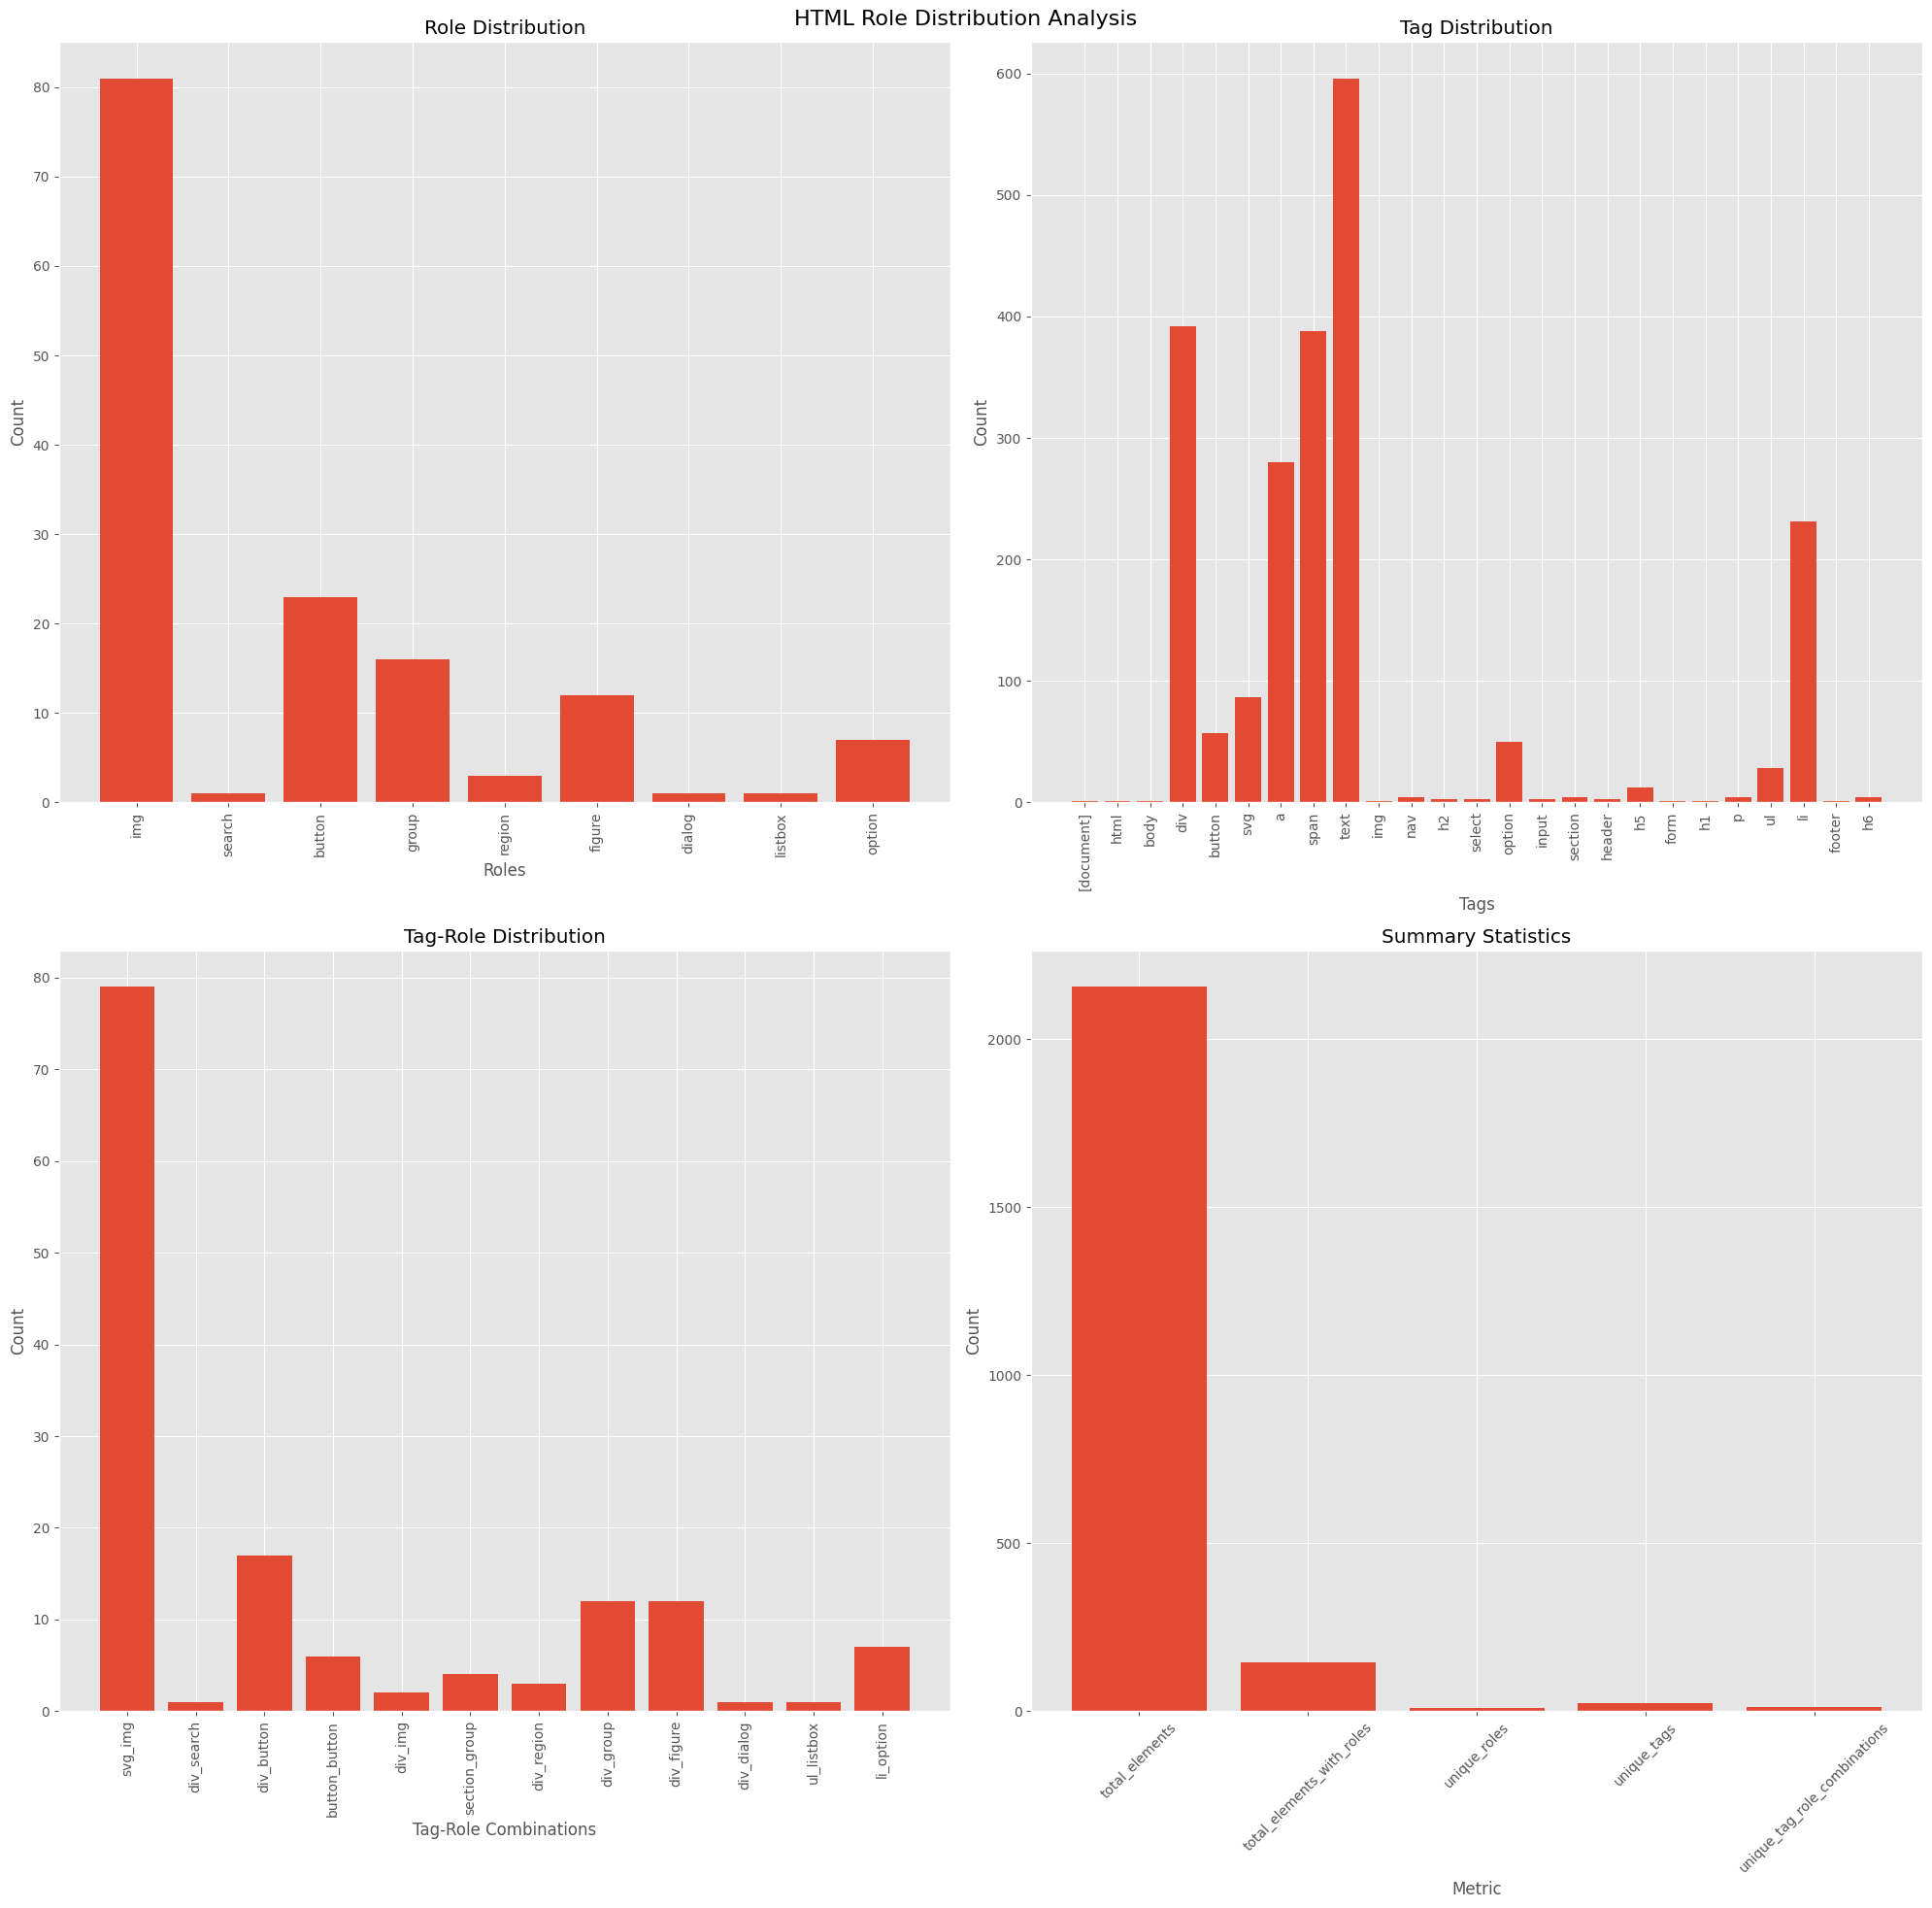

In [ ]:
analysis_results = analyze_html_role_distribution(ex_action['cleaned_html'])
plot_html_role_distribution(analysis_results)

In [ ]:
#@title Candidates extracted from html
ex_action['neg_candidates'] # Candidates extracted from the HTML

[{'attributes': '{"backend_node_id": "3563", "bounding_box_rect": "0,0,1280,8308.671875", "id": "Root", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '3563',
  'tag': 'div'},
 {'attributes': '{"backend_node_id": "3564", "bounding_box_rect": "0,0,1280,8308.671875", "class": "Wrapper", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '3564',
  'tag': 'div'},
 {'attributes': '{"backend_node_id": "3571", "bounding_box_rect": "0,0,1280,8308.671875", "class": "LoadingComponent", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '3571',
  'tag': 'div'},
 {'attributes': '{"backend_node_id": "3572", "bounding_box_rect": "0,0,1280,8308.671875", "class": "PageWrapper is-home css-cis7bl", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '3572',
  'tag': 'div'},
 {'attributes': '{"backend_node_id": "3580", "bounding_box_rect": "1038.5,12.984375,223.5,13", "class": "MarketingSiteSecondaryHeader-link Anchor", "is_clickable": "true", "data_

In [ ]:
ex_action['pos_candidates'] # Possible candidate

[{'attributes': '{"backend_node_id": "21416", "bounding_box_rect": "286,318,448,72", "role": "option", "aria_label": "Brooklyn, New York, United States", "class": "", "id": "1579_city_Brooklyn, New York, United States", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '21416',
  'is_original_target': False,
  'is_top_level_target': True,
  'tag': 'li'}]

### Action Dependencies

Question: <font color="red">**Are there action dependencies?** Is the sequence of actions always the same?</font>

In [ ]:
import pandas as pd
from collections import Counter

def analyze_task_sequences(actions_df):
    # Group actions by annotation_id (task)
    grouped = actions_df.groupby('annotation_id')

    # Store sequences for each task
    task_sequences = []

    # Analyze each task
    for _, group in grouped:
        sequence = tuple(group['operation_op'].tolist())
        task_sequences.append(sequence)

    # Count unique sequences
    sequence_counts = Counter(task_sequences)

    # Calculate statistics
    total_tasks = len(task_sequences)
    unique_sequences = len(sequence_counts)
    most_common_sequence, most_common_count = sequence_counts.most_common(1)[0]

    print(f"Total number of tasks: {total_tasks}")
    print(f"Number of unique action sequences: {unique_sequences}")
    print(f"Percentage of tasks with unique sequences: {unique_sequences/total_tasks*100:.2f}%")
    print(f"\nMost common sequence (occurs {most_common_count} times, {most_common_count/total_tasks*100:.2f}% of tasks):")
    print(" -> ".join(most_common_sequence))

    print("\nTop 5 most common sequences:")
    for sequence, count in sequence_counts.most_common(5):
        print(f"Occurs {count} times ({count/total_tasks*100:.2f}% of tasks):")
        print(" -> ".join(sequence))
        print()

    return sequence_counts

# Assuming 'actions_df' is your actions DataFrame
sequence_counts = analyze_task_sequences(actions_df)

Total number of tasks: 1009
Number of unique action sequences: 366
Percentage of tasks with unique sequences: 36.27%

Most common sequence (occurs 81 times, 8.03% of tasks):
CLICK -> CLICK -> CLICK

Top 5 most common sequences:
Occurs 81 times (8.03% of tasks):
CLICK -> CLICK -> CLICK

Occurs 67 times (6.64% of tasks):
CLICK -> CLICK -> CLICK -> CLICK

Occurs 49 times (4.86% of tasks):
CLICK -> CLICK -> CLICK -> CLICK -> CLICK

Occurs 35 times (3.47% of tasks):
CLICK -> CLICK -> CLICK -> CLICK -> CLICK -> CLICK

Occurs 31 times (3.07% of tasks):
CLICK -> CLICK -> CLICK -> CLICK -> CLICK -> CLICK -> CLICK



In [ ]:
import pandas as pd
from collections import Counter
from itertools import combinations

def find_permutable_actions(actions_df, threshold=0.8):
    # Group actions by annotation_id (task)
    grouped = actions_df.groupby('annotation_id')

    # Store sequences and action sets for each task
    task_sequences = []
    task_action_sets = []

    # Analyze each task
    for _, group in grouped:
        sequence = tuple(group['operation_op'].tolist())
        task_sequences.append(sequence)
        task_action_sets.append(set(sequence))

    # Find tasks with the same set of actions
    action_set_to_tasks = {}
    for i, action_set in enumerate(task_action_sets):
        key = frozenset(action_set)
        if key not in action_set_to_tasks:
            action_set_to_tasks[key] = []
        action_set_to_tasks[key].append(i)

    permutable_pairs = Counter()
    total_pairs = Counter()

    for task_group in action_set_to_tasks.values():
        if len(task_group) > 1:
            for i, j in combinations(task_group, 2):
                seq1, seq2 = task_sequences[i], task_sequences[j]
                for a1, a2 in zip(seq1, seq2):
                    pair = None
                    if a1 != a2:
                        pair = tuple(sorted([a1, a2]))
                        permutable_pairs[pair] += 1
                    total_pairs[pair] += 1

    # Calculate permutability scores
    permutable_actions = {}
    for pair, count in permutable_pairs.items():
        total = total_pairs[pair]
        score = count / total
        if score >= threshold:
            permutable_actions[pair] = score

    # Sort by permutability score
    sorted_permutable = sorted(permutable_actions.items(), key=lambda x: x[1], reverse=True)

    print("Potentially permutable action pairs (with score):")
    for (a1, a2), score in sorted_permutable:
        print(f"{a1} <-> {a2}: {score:.2f}")

    return permutable_actions

# Assuming 'actions_df' is your actions DataFrame
permutable_actions = find_permutable_actions(actions_df)

UnboundLocalError: local variable 'pair' referenced before assignment

___
1. Check for the length of the tasks

### Dynamic Website

Question: <font color='red'>**Are the pages dynamic?** Is there more than one page in a sequence of actions?</font>

In [ ]:
def analyze_html_changes(main_df):
    dynamic_changes = 0
    total_actions = 0
    ratios = []
    task_labels = []

    tasks_count = len(main_df)
    for task_index, row in main_df.iterrows():
        task_dynamic_changes = 0
        prev_html = None
        actions_count = len(row['actions'])
        task_ratios = []

        print(f"Processing task {row['annotation_id']} with {actions_count} actions")

        for action_index, action in enumerate(row['actions'], 1):
            current_html = action['cleaned_html']
            if prev_html:
                diff = difflib.SequenceMatcher(None, prev_html, current_html)
                ratio = diff.quick_ratio()  # Using quick_ratio() for performance
                task_ratios.append(ratio)
                if ratio < 0.99:
                    dynamic_changes += 1
                    task_dynamic_changes += 1
            total_actions += 1
            prev_html = current_html

            # Print progress for current task
            print_progress_bar(action_index, actions_count, prefix='Task Progress:', suffix='Complete', length=30)

        print()  # New line after task progress bar

        # Print progress for overall analysis
        print_progress_bar(task_index + 1, tasks_count, prefix='Overall Progress:', suffix='Complete', length=30)

        # Construct the label
        task_label = f"task_{task_index} - {row['domain']} - {row['subdomain']}"
        task_labels.append(task_label)

        # Store Task ratios
        ratios.append(task_ratios)

        print(f"\nTask {row['annotation_id']} has {task_dynamic_changes} dynamic changes out of {actions_count} actions")
        print(np.round(np.array(task_ratios), 3))
        avg_ratio = sum(task_ratios) / len(task_ratios) if task_ratios else 0
        print(f"Average similarity ratio: {avg_ratio}")
        print()

    return ratios, dynamic_changes, total_actions, task_labels


In [ ]:
def create_similarity_heatmap_df(ratios, task_labels):
    max_actions = max(len(task_ratios) for task_ratios in ratios)
    padded_ratios = []
    for task_ratios in ratios:
        padded_task = task_ratios + [np.nan] * (max_actions - len(task_ratios))
        padded_ratios.append(padded_task)

    df_heatmap = pd.DataFrame(padded_ratios, index=task_labels)
    df_heatmap.columns = [f'Action {i+2}' for i in range(max_actions)]
    return df_heatmap


In [ ]:
def plot_similarity_heatmap(df_heatmap, fig_size_x=20, fig_size_y=15):
    plt.figure(figsize=(fig_size_x, fig_size_y))

    sns.heatmap(
        df_heatmap,
        cmap='Spectral',
        annot=False,
        fmt=".2f",
        cbar_kws={'label': 'Similarity Ratio'},
        linewidths=0.5,
        linecolor='white',
        vmin=0,
        vmax=1
    )

    plt.xlabel('Action Index', fontsize=14)
    plt.ylabel('Task Index - Domain - Subdomain', fontsize=14)
    plt.title('Heatmap of Similarity Ratios Between Consecutive Actions', fontsize=16)

    # Adjust the y-axis to accommodate longer labels
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)  # Reduce font size if labels are too long

    plt.tight_layout()
    plt.show()

Streaming output truncated to the last 5000 lines.
Overall Progress: |███████████-------------------| 39.1% Complete
Task 36f2e415-356b-4e44-9ab1-6c3054d4de1f has 6 dynamic changes out of 7 actions
[0.944 0.943 0.751 0.989 0.983 0.753]
Average similarity ratio: 0.8935567342196857

Processing task 8082086a-10a7-4631-9792-b57337426f9a with 7 actions
Task Progress: |██████████████████████████████| 100.0% Complete

Overall Progress: |███████████-------------------| 39.2% Complete
Task 8082086a-10a7-4631-9792-b57337426f9a has 6 dynamic changes out of 7 actions
[0.951 0.95  0.751 0.751 0.317 0.983]
Average similarity ratio: 0.7838416319769329

Processing task 81835704-aebc-4600-abd4-02102509fda5 with 19 actions
Task Progress: |██████████████████████████████| 100.0% Complete

Overall Progress: |███████████-------------------| 39.3% Complete
Task 81835704-aebc-4600-abd4-02102509fda5 has 17 dynamic changes out of 19 actions
[0.947 0.947 0.753 0.99  0.989 0.765 0.765 0.755 0.987 0.385 0.661 0.98

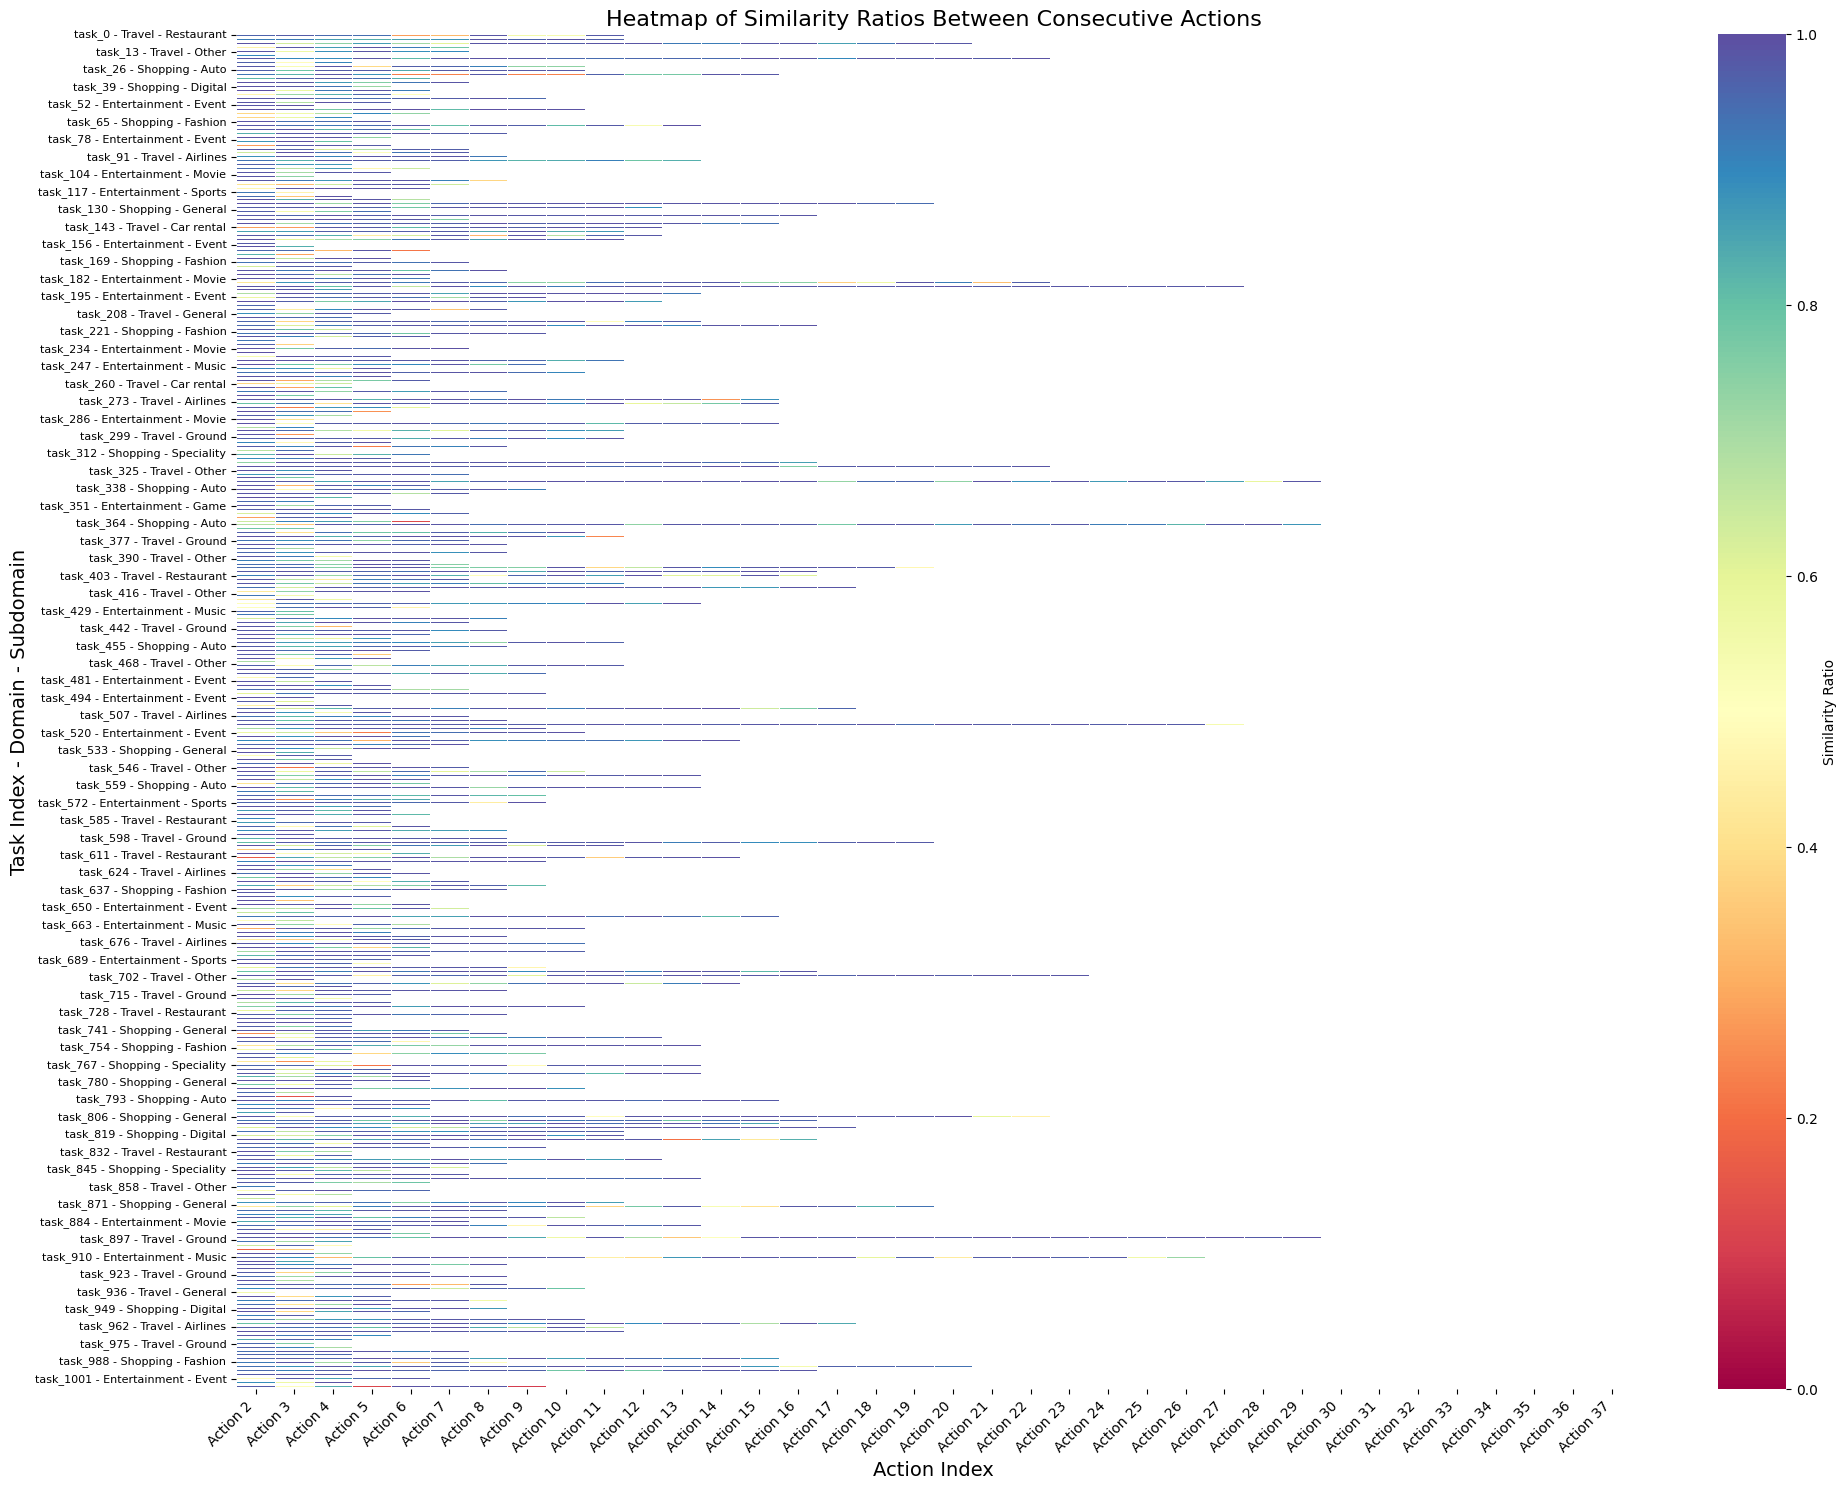

In [ ]:
ratios, dynamic_changes, total_actions, task_labels = analyze_html_changes(main_df)
df_heatmap = create_similarity_heatmap_df(ratios, task_labels)

In [ ]:
# Print the average similarity ratio
avg_ratios = [np.mean(task_ratios) for task_ratios in ratios]
print(f"Average similarity ratio: {np.mean(avg_ratios)}")

#Print the mean
print(f"Mean similarity ratio: {np.mean(avg_ratios)}")

# Print the standard deviation
print(f"Standard deviation of similarity ratio: {np.std(avg_ratios)}")

Average similarity ratio: 0.8728101335902984
Mean similarity ratio: 0.8728101335902984
Standard deviation of similarity ratio: 0.09597217311507278


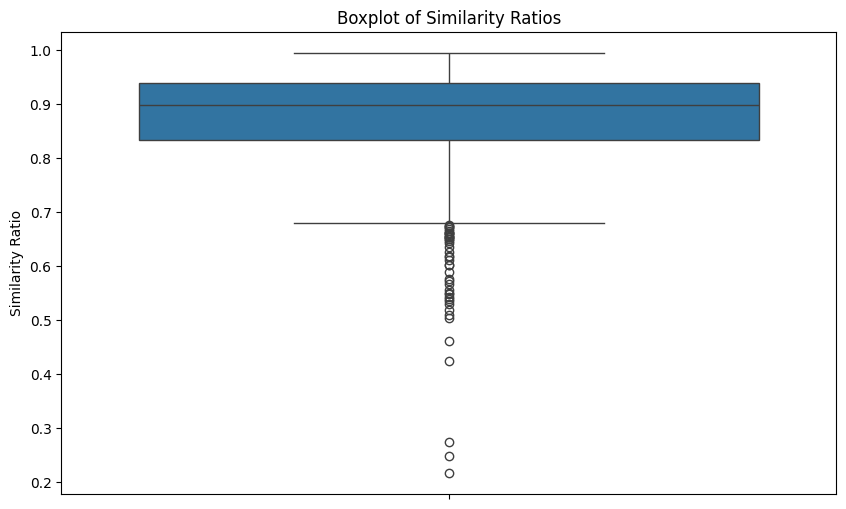

In [ ]:
#Boxplot of the similarity ratios
plt.figure(figsize=(10, 6))
sns.boxplot(y=avg_ratios)
plt.ylabel('Similarity Ratio')
plt.title('Boxplot of Similarity Ratios')
plt.show()

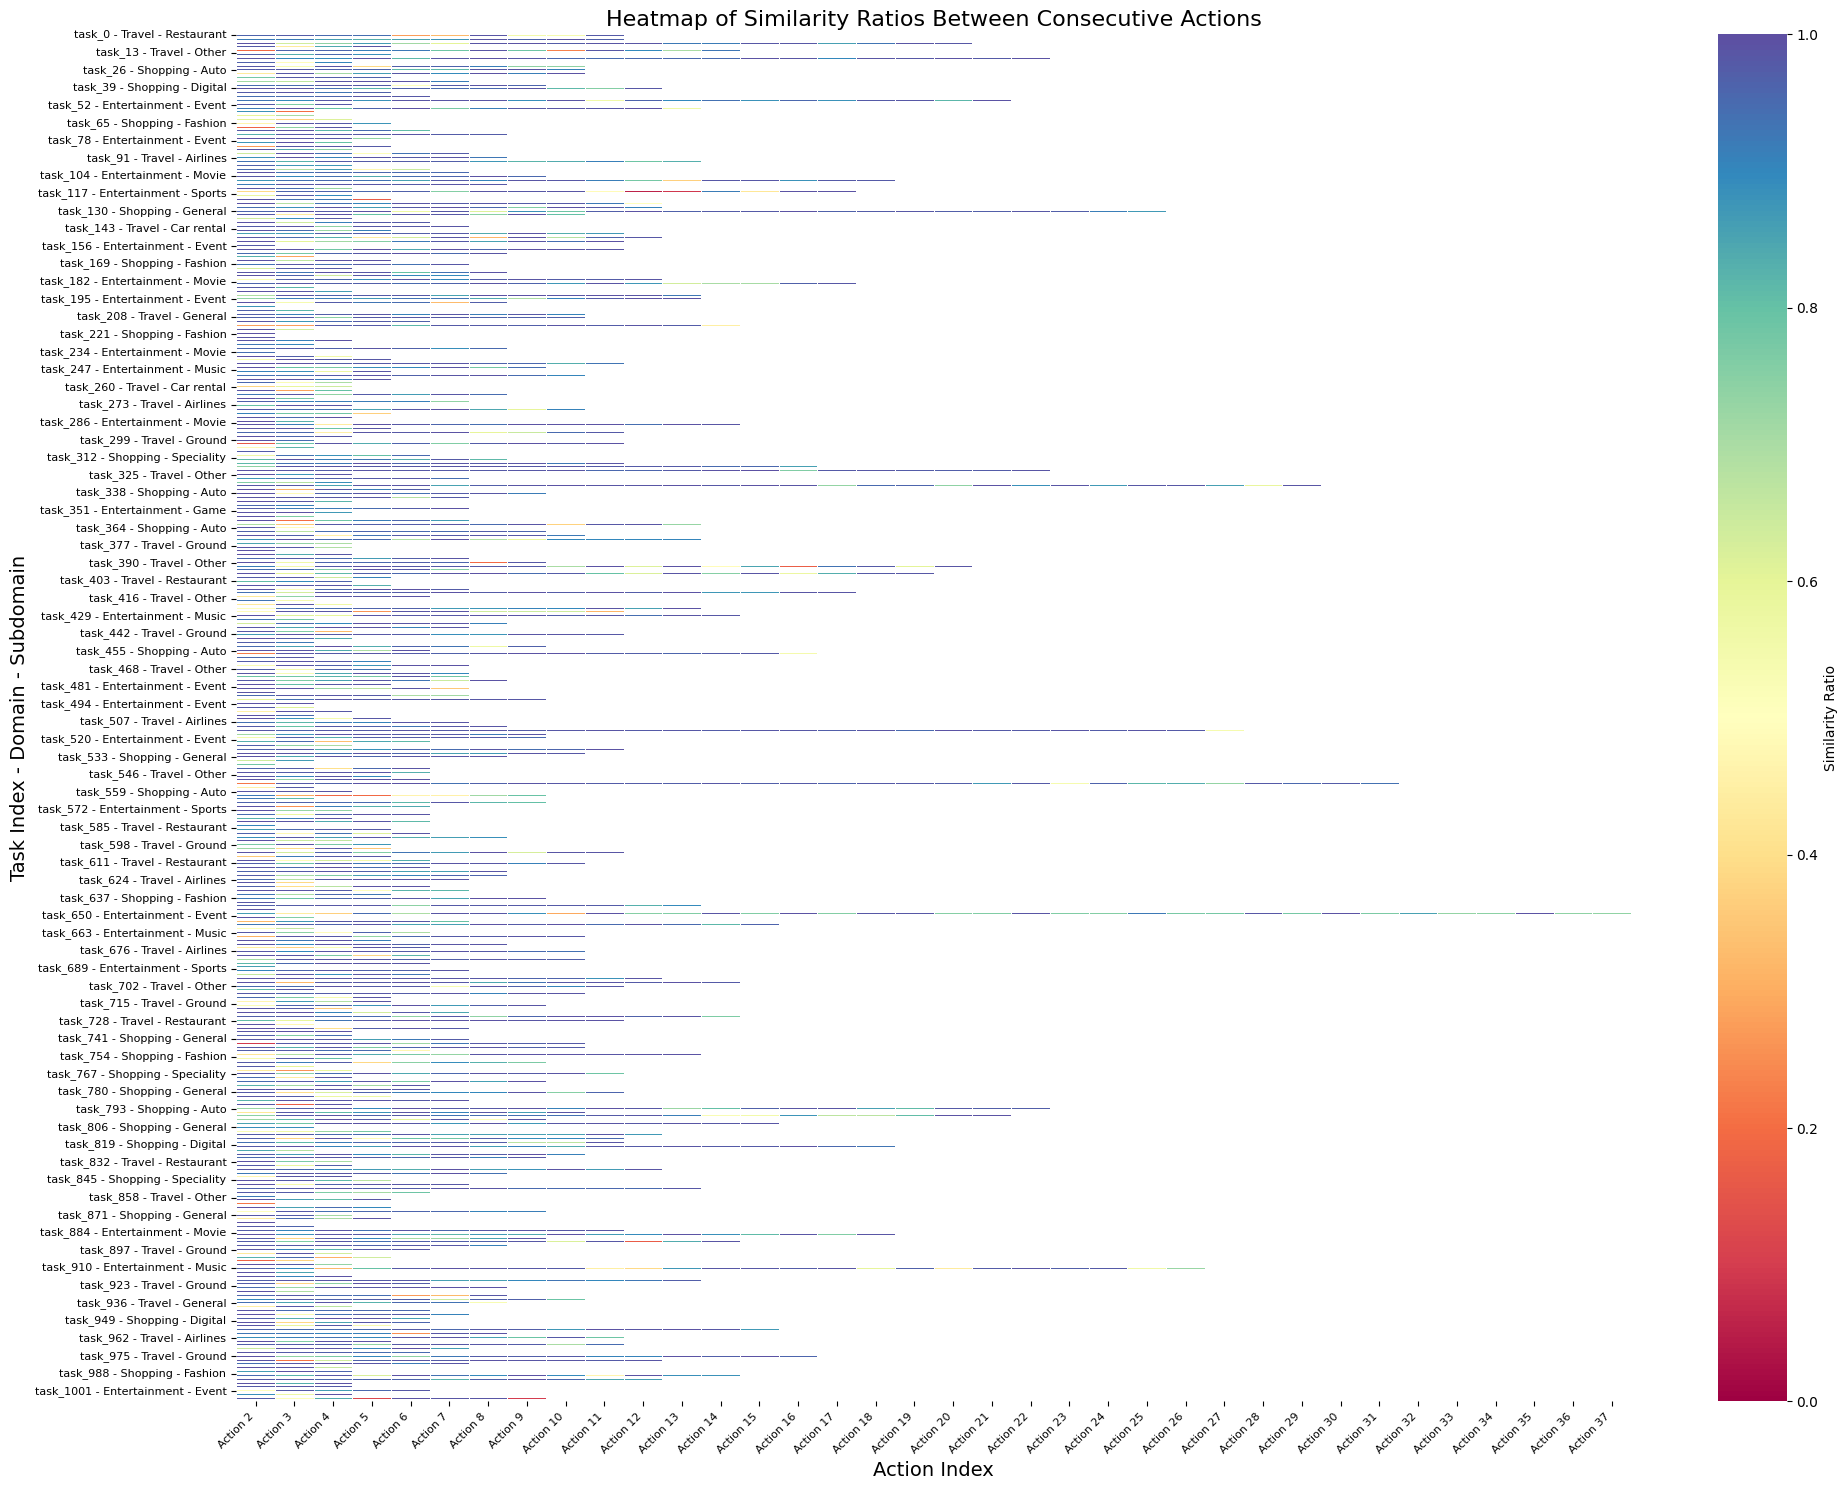

In [ ]:
plot_similarity_heatmap(df_heatmap)

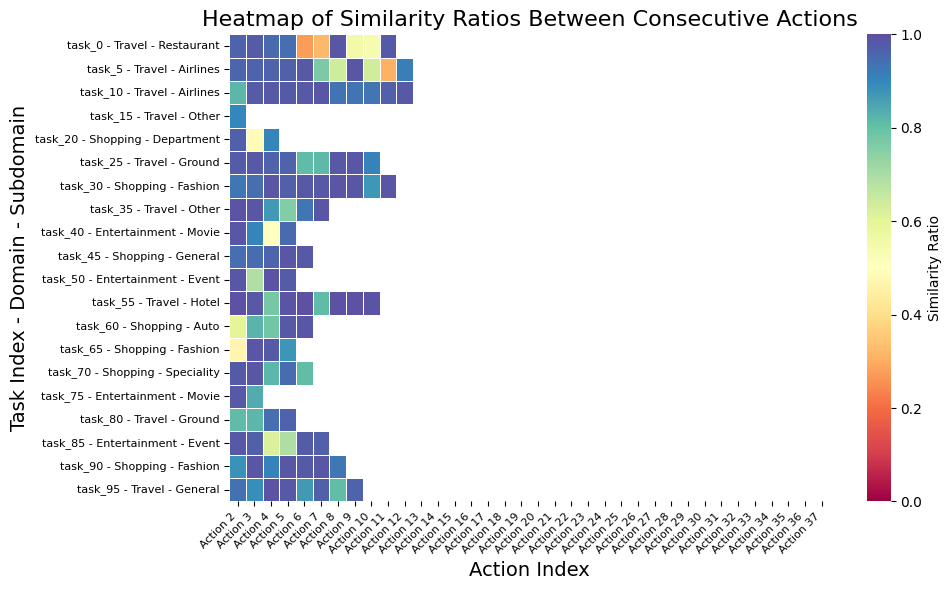

In [ ]:
# Heatmap of a subset of tasks
df_subset = df_heatmap.iloc[:100:5]
plot_similarity_heatmap(df_subset, 10, 6)

___
**Results**:

- In general the html data shows some variability within actions.
- There are some actions which have a bigger impact on the change of the HTML data.
___

**New Questions**
1. Are the bigger changes related to specific actions?
2. Are the bigger changes related to the website, domain or subdomain?
___

### Level distribution of the positive candidates

Find the distribution of the positive candidates and the number of children they have

In [ ]:
#@title parse HTML
from bs4 import BeautifulSoup
import pandas as pd

# Function to create a path with parent 'backend_node_id' attributes
def create_path(node, path=''):
    # Recursively build the path using 'backend_node_id' attributes
    if not node or not node.has_attr('backend_node_id'):
        return path
    current_node_id = node['backend_node_id']
    parent_path = create_path(node.parent, path)
    return f"{parent_path}/{current_node_id}".lstrip('/')

# Function to recursively gather text from both the current element and its children
def gather_text(element):
    # If the element itself has text, capture it
    text = element.get_text(separator=' ', strip=True) if element else ''
    return text

# Function to parse the HTML and extract paths and content for use in LAM models
def parse_html_for_rag(html_content):
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')

    # List to store parsed data
    data = []

    # Iterate through all elements with 'backend_node_id' attributes
    for element in soup.find_all(attrs={"backend_node_id": True}):
        # Create hierarchical path using parent-child relationships
        path = create_path(element)

        # Gather text content from the current element and its children
        text = gather_text(element)

        # Check for interactive components and attributes that signify interaction
        is_interactive = element.name in ['button', 'a', 'input', 'select', 'textarea'] or element.has_attr('role')

        # Extract additional attributes that might indicate interactive behavior
        element_info = {
            "backend_node_id": element.get("backend_node_id"),
            "tag": element.name,
            "text": text,
            "path": path,
            "is_interactive": is_interactive,
            "role": element.get("role"),
            "aria_label": element.get("aria_label"),
        }

        # Include elements that are interactive or have meaningful text content
        if is_interactive or text.strip():
            data.append(element_info)

    # Convert the data into a DataFrame
    df = pd.DataFrame(data)

    return df

# NOTE: We could clean the text

In [ ]:
parsed_html_df = parse_html_for_rag(ex_action['cleaned_html'])
parsed_html_df

NameError: name 'ex_action' is not defined

In [ ]:
pos_candidates = ex_action['pos_candidates']
pos_candidates

[{'attributes': '{"backend_node_id": "48537", "bounding_box_rect": "1210,216.796875,24,24", "class": "A_8a-icon", "role": "img", "data_pw_testid_buckeye_candidate": "1"}',
  'backend_node_id': '48537',
  'is_original_target': True,
  'is_top_level_target': True,
  'tag': 'svg'}]

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

def analyze_child_distribution(parsed_html_df, pos_candidates):
    # Initialize list to store analysis results
    node_analysis = []

    # Analyze each positive candidate
    for candidate in pos_candidates:
        node_id = candidate['backend_node_id']
        tag = candidate['tag']  # Include the tag from pos_candidate

        # Get all children of this node
        children = parsed_html_df[parsed_html_df['path'].apply(lambda x: f'/{node_id}/' in x)].copy()

        # Analyze this node
        analysis = {
            'node_id': node_id,
            'tag': tag,  # Include the tag in the analysis
            'num_children': len(children),
            'child_tag_distribution': children['tag'].value_counts().to_dict() if not children.empty else {},
            'max_depth': max([len(path.split('/')) for path in children['path']]) if not children.empty else 0,
            'has_text': not children[children['text'].notna()].empty,
            'unique_tags': children['tag'].nunique(),
            'direct_children': len(children[children['path'].apply(lambda x: x.count('/') == x.find(f'/{node_id}/') / len(f'/{node_id}/'))])
        }

        # Add text analysis if available
        if 'text' in children.columns:
            text_nodes = children[children['text'].notna()]
            analysis['num_text_nodes'] = len(text_nodes)
            analysis['text_examples'] = text_nodes['text'].tolist()[:3]  # First 3 text examples

        node_analysis.append(analysis)

    return pd.DataFrame(node_analysis)

In [ ]:
results = []
for _, row in main_df.iterrows():
  for action in row['actions']:
    pos_candidates = action['pos_candidates']
    parsed_html_df = parse_html_for_rag(action['cleaned_html'])
    analysis_df = analyze_child_distribution(parsed_html_df, pos_candidates)
    results.append(analysis_df)

In [ ]:
results = []
row = main_df.iloc[0]
for action in row['actions']:
    pos_candidates = action['pos_candidates']
    parsed_html_df = parse_html_for_rag(action['cleaned_html'])
    analysis_df = analyze_child_distribution(parsed_html_df, pos_candidates)
    results.append(analysis_df)

NameError: name 'parse_html_for_rag' is not defined

In [ ]:
all_results = pd.concat(results, ignore_index=True)
all_results

In [ ]:
# Create visualizations
plt.figure(figsize=(15, 10))
sns.histplot(data=all_results, x='num_children', bins=20)
plt.title('Distribution of Number of Children per Positive Candidate')
plt.xlabel('Number of Children')
plt.ylabel('Count')

# Tag distribution across all positive candidates
all_tags = defaultdict(int)
for dist in all_results['child_tag_distribution']:
    for tag, count in dist.items():
        all_tags[tag] += count

# Print summary statistics
print("Summary Statistics:")
print(f"Average number of children: {all_results['num_children'].mean():.2f}")
print(f"Median number of children: {all_results['num_children'].median()}")
print(f"Maximum number of children: {all_results['num_children'].max()}")
print(f"Average depth of child nodes: {all_results['max_depth'].mean():.2f}")
print("\nMost common child tags:")
for tag, count in sorted(all_tags.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{tag}: {count}")

plt.show()

NameError: name 'all_results' is not defined

<Figure size 1500x1000 with 0 Axes>

### Postive_candidates tags distribution

In [ ]:
import json
from datasets import DatasetDict
from typing import Dict, Any

def count_positive_candidates_with_note(dataset: DatasetDict) -> Dict[str, int]:
    results = {}

    for split_name, split_dataset in dataset.items():
        total_count = 0

        for item in split_dataset:
            for action in item['actions']:
                for pos_candidate in action['pos_candidates']:
                    attributes = json.loads(pos_candidate['attributes'])
                    if 'note' in attributes:
                        total_count += 1

        results[split_name] = total_count

    return results

  # Count positive candidates with note text
result = count_positive_candidates_with_note(ds)

# Print results
for split_name, count in result.items():
    print(f"Number of positive candidates with note text in {split_name} split: {count}")

# Calculate and print the total across all splits
total_count = sum(result.values())
print(f"Total number of positive candidates with note text across all splits: {total_count}")

Number of positive candidates with note text in train split: 0
Total number of positive candidates with note text across all splits: 0


In [ ]:
all_tags = defaultdict(int)
for dist in all_results['child_tag_distribution']:
    for tag, count in dist.items():
        all_tags[tag] += count

NameError: name 'defaultdict' is not defined

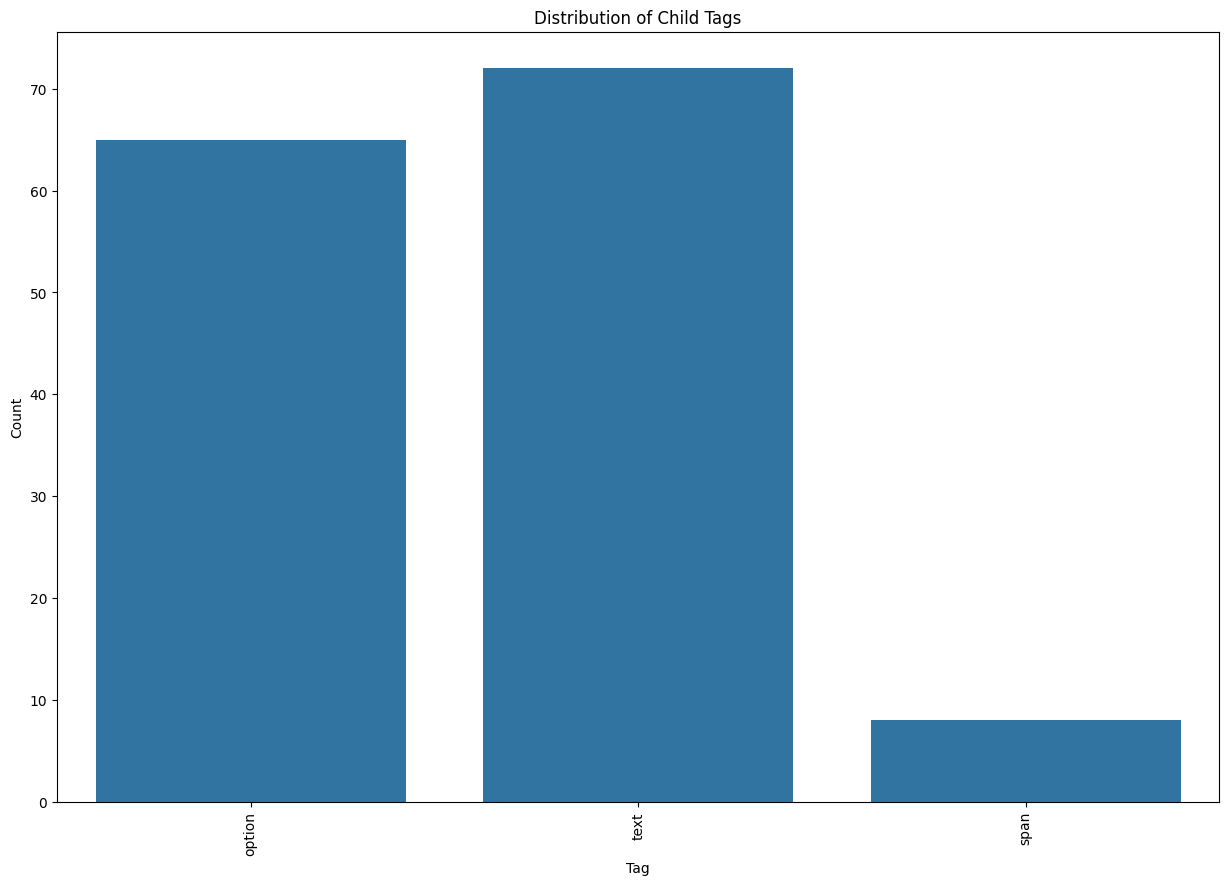

In [ ]:
# Plot all tags distribution
plt.figure(figsize=(15, 10))
sns.barplot(x=list(all_tags.keys()), y=list(all_tags.values()))
plt.xticks(rotation=90)
plt.title('Distribution of Child Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.show()

### TOP_LEVEL_TARGET analysis

In [ ]:
%pip install ace-tools

In [ ]:
import pandas as pd
import json
import ace_tools as tools

# Initialize a list to store intersections
intersection_results = []

# Iterate over each action in the 'actions' column to find intersections
for task in main_df.int
for actions in main_df['actions']:
    for action in actions:
        pos_backend_ids = {candidate['backend_node_id'] for candidate in action['pos_candidates']}
        neg_backend_ids = {candidate['backend_node_id'] for candidate in action['neg_candidates']}

        # Find the intersection between positive and negative candidates
        intersection = pos_backend_ids.intersection(neg_backend_ids)

        if intersection:
            intersection_results.append({
                "action_uid": action['action_uid'],
                "intersection_backend_ids": list(intersection)
            })

# Display results
tools.display_dataframe_to_user(name="Intersection Between Positive and Negative Candidates", dataframe=pd.DataFrame(intersection_results))